## ICONICIT 2024: Strategi *Data-Driven* untuk Mengurangi Risiko Gagal Bayar Pinjaman Pribadi

# 1. Business Understanding
### a. Pendahuluan :

Dalam dunia perbankan modern, salah satu tantangan terbesar adalah bagaimana menyeimbangkan antara pertumbuhan bisnis dan pengelolaan risiko. Bank dan lembaga keuangan semakin menghadapi tantangan dalam menilai kelayakan kredit dari calon peminjam dengan akurat. Proses ini sangat penting, terutama dalam hal persetujuan pinjaman pribadi, di mana keputusan yang salah bisa berakibat pada kerugian finansial yang signifikan. Oleh karena itu, lembaga keuangan mengandalkan pendekatan berbasis data untuk memprediksi kemampuan pemohon dalam melunasi pinjaman. Sistem penilaian ini harus mempertimbangkan berbagai aspek dari profil peminjam, seperti riwayat keuangan, stabilitas pekerjaan, dan kemampuan membayar kembali pinjaman.

Untuk membuat keputusan yang lebih baik dan mengurangi risiko kredit macet, bank kini mulai mengadopsi teknik analisis data yang lebih canggih. Mereka tidak hanya bergantung pada data tradisional seperti catatan perbankan dan laporan kredit, tetapi juga memanfaatkan data tidak terstruktur seperti pola perilaku digital dan aktivitas transaksi yang lebih luas. Dengan menggabungkan sumber data yang beragam ini, bank dapat membangun model prediksi yang lebih akurat dan komprehensif, yang mampu menilai risiko secara lebih mendalam dan spesifik.

### b. Tujuan dan Fokus Proyek :
Tujuan utama dari proyek ini adalah untuk meningkatkan keakuratan prediksi persetujuan pinjaman pribadi dengan mengklasifikasikan risiko gagal bayar peminjam berdasarkan label: '1' untuk risiko tidak bisa membayar dan '0' untuk risiko bisa membayar. Kami berfokus pada data yang tersedia yang lebih mendekati informasi pribadi peminjam, seperti jenis kelamin, kepemilikan kendaraan dan properti, jumlah anak, pendapatan tahunan, jenis pendapatan, tingkat pendidikan, status perkawinan, jenis tempat tinggal, usia, lama bekerja, dan informasi kontak seperti telepon dan email. Tantangan utamanya adalah mengintegrasikan berbagai jenis data ini ke dalam satu model klasifikasi yang efektif untuk mengevaluasi risiko kredit secara akurat.

Pendekatan ini tidak hanya bertujuan untuk mengurangi potensi kerugian akibat kredit macet, tetapi juga meningkatkan profitabilitas bank dengan cara memberikan penilaian yang lebih tepat terhadap risiko kredit. Dengan menggunakan teknik analisis data seperti pembelajaran mesin, kami berusaha memahami pola-pola yang tersembunyi dalam data yang tersedia, untuk mengidentifikasi peminjam yang memiliki risiko tinggi dan memastikan keputusan kredit yang lebih bijaksana dan tepat waktu.

Proyek ini juga bertujuan untuk mengeksplorasi penggunaan data yang lebih dalam, seperti status kepemilikan properti atau jumlah anggota keluarga, yang dapat memberikan wawasan lebih lanjut tentang stabilitas finansial peminjam. Dengan pemahaman yang lebih baik tentang faktor-faktor ini, kami dapat mengembangkan model prediksi yang lebih tangguh dan mampu menangkap dinamika risiko yang kompleks, sekaligus mendukung upaya bank untuk memberikan layanan kredit yang lebih aman dan efisien.

# 2. Preparing Dataset

In [81]:
import pandas as pd
import numpy as np

In [82]:
data = pd.read_csv("Credit_card.csv")
label = pd.read_csv("Credit_card_label.csv")

# joinning data and label based on Ind_ID
df = pd.merge(data, label, on='Ind_ID')

df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [83]:
filtered_data = df[df['Type_Occupation'].isna()]

# Lihat nilai unik dari Type_Income dalam data yang telah difilter
unique_values = filtered_data['Type_Income'].unique()
unique_values

array(['Pensioner', 'Commercial associate', 'Working', 'State servant'],
      dtype=object)

# 3. Data Understanding

### a. Data Cleaning :

**Proses Data Cleaning yang Dilakukan:**
1. Pemeriksaan Duplikasi Data; Dilakukan pengecekan untuk mengetahui adanya duplikasi data, dan hasilnya tidak ditemukan duplikasi pada dataset.
2. Mengubah Tipe Data Variabel Kategorik; Variabel Mobile_phone, Work_phone, Phone, dan EMAIL_ID diubah menjadi tipe data object. Awalnya, variabel-variabel ini dibaca sebagai tipe data integer.
3. Membentuk Fitur Age; Fitur Age dibentuk dengan mengekstrak nilai pada fitur Birthday_count untuk mengubahnya menjadi satuan tahun. Nama fitur Birthday_count kemudian diubah menjadi Age.

Contoh:
$${Age} = \frac{BirthdayCount}{-365}$$
​
4. Membentuk Fitur Employed_years; Fitur Employed_years dibentuk dengan mengekstrak nilai pada fitur Employed_days untuk mengubahnya menjadi satuan tahun. Pada fitur Employed_days, terdapat nilai 365243 yang dianggap tidak masuk akal karena setara dengan lebih dari 1000 tahun. Setelah dilakukan identifikasi, semua individu dengan nilai tersebut diketahui sebagai seorang pensiunan. Oleh karena itu, individu dengan nilai 365243 pada Employed_days akan diberikan nilai 0 pada Employed_years, yang menunjukkan bahwa individu tersebut sudah tidak bekerja.

Contoh:
$${EmployedYears} = \frac{EmployedDays}{-365}$$
jika
 $${EmployedDays}\neq365243$$
dan
$${EmployedYears} = 0 $$
jika
 $${EmployedDays} = 365243$$

In [84]:
# Melihat tipe data tiap fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [85]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [86]:
df.describe(include='object')

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation
count,1541,1548,1548,1548,1548,1548,1548,1060
unique,2,2,2,4,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,973,924,1010,798,1031,1049,1380,268


**Check for Duplicated Data**

In [87]:
# Cek apakah ada baris duplikat
df.duplicated().any()

False

**Handling Data Inaccuracies**

The data type of the Mobile_Phone, Work_Phone, Phone, EMAIL_ID, and label columns will be changed to object because their values of 1 and 0 are currently detected as integers.

In [88]:
df['Mobile_phone'] = df['Mobile_phone'].astype('object')
df['Work_Phone'] = df['Work_Phone'].astype('object')
df['Phone'] = df['Phone'].astype('object')
df['EMAIL_ID'] = df['EMAIL_ID'].astype('object')
df['label'] = df['label'].astype('object')

**Birthday_count**

The Birthday_count values will be divided by -365 and rounded because the original data is inaccurate, with all values being negative and not considered as years

In [89]:
df['Age'] = (df['Birthday_count'] / -365)
df.drop(columns=['Birthday_count'], inplace=True)

**Employed_days**

The values in the Employed_days column will be divided by -365 and then rounded. Moreover, any value of 365243.000000 will be set to NaN, as it is unrealistic for someone to have worked for 1,000 years. Notably, 261 out of the 269 individuals categorized as 'Pensioner' have this unrealistic Employed_days value.

In [90]:
filtered_df = df[df['Employed_days'] == 365243]
filtered_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,365243,1,0,0,0,NaN,2,1,51.430137
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,365243,1,0,0,0,NaN,2,1,60.641096
26,5024916,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,365243,1,0,1,0,NaN,2,1,59.813699
27,5024917,F,N,Y,0,NaN,Pensioner,Secondary / secondary special,Married,House / apartment,365243,1,0,1,0,NaN,2,1,59.813699
31,5029311,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,365243,1,0,1,1,NaN,2,1,59.934247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,5024077,F,Y,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,365243,1,0,0,0,NaN,1,0,55.978082
1511,5053535,F,N,Y,0,216000.0,Pensioner,Higher education,Single / not married,House / apartment,365243,1,0,0,0,NaN,1,0,55.857534
1514,5051097,F,N,N,0,69750.0,Pensioner,Secondary / secondary special,Widow,Municipal apartment,365243,1,0,1,0,NaN,1,0,60.235616
1525,5023719,F,Y,Y,0,175500.0,Pensioner,Higher education,Married,House / apartment,365243,1,0,1,0,NaN,2,0,60.484932


In [91]:
filtered_df['Type_Income'].unique()

array(['Pensioner'], dtype=object)

In [92]:
count_pensioners = (df['Type_Income'] == 'Pensioner').sum()
count_pensioners

269

In [93]:
# Sulit dapet insight dari sini buat replace nilai yang unrealistic itu
filtered_df2 = df[(df['Type_Income'] == 'Pensioner') & (df['Employed_days'] != 365243)]
filtered_df2

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-586,1,1,1,0,NaN,2,1,37.142466
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-678,1,0,1,1,Core staff,3,1,49.789041
14,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,-913,1,0,0,1,NaN,3,1,24.402740
19,5021998,M,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-1644,1,0,0,1,NaN,2,1,51.679452
45,5046328,F,N,Y,1,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-2269,1,0,1,0,Low-skill Laborers,3,1,42.372603
126,5116906,M,Y,Y,0,211500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-7553,1,0,0,0,Core staff,2,1,41.224658
174,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-1325,1,0,1,1,Medicine staff,2,1,33.936986
1538,5125816,F,Y,N,0,450000.0,Pensioner,Higher education,Married,House / apartment,-5521,1,1,1,0,Managers,2,0,54.200000


In [94]:
count = df[df['Employed_days'] == 365243.000000].shape[0]

count

261

In [95]:
# Menghitung jumlah nilai positif di Employed_days
positive_count = (df['Employed_days'] > 0).sum()

# Menghitung jumlah nilai negatif di Employed_days
negative_count = (df['Employed_days'] < 0).sum()

print(f"Jumlah nilai positif: {positive_count}")
print(f"Jumlah nilai negatif: {negative_count}")


Jumlah nilai positif: 261
Jumlah nilai negatif: 1287


In [96]:
df['Employed_years'] = df['Employed_days'].apply(lambda x: 0 if x == 365243.000000 else (x / -365))
df.drop(columns=['Employed_days'], inplace=True)

**Check**

In [97]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Family_Members,Age,Employed_years
count,1.548000e+03,1548.000000,1.525000e+03,1548.000000,1526.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,2.161499,43.946143,6.073914
std,4.171759e+04,0.776691,1.132530e+05,0.947772,11.587680,6.584342
min,5.008827e+06,0.000000,3.375000e+04,1.000000,21.109589,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,2.000000,34.019178,1.182877
50%,5.078842e+06,0.000000,1.665000e+05,2.000000,42.908219,4.287671
75%,5.115673e+06,1.000000,2.250000e+05,3.000000,53.569863,8.697260
max,5.150412e+06,14.000000,1.575000e+06,15.000000,68.345205,40.786301


In [98]:
df.describe(include='object')

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,label
count,1541,1548,1548,1548,1548,1548,1548,1548,1548,1548,1548,1060,1548
unique,2,2,2,4,5,5,6,1,2,2,2,18,2
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,0
freq,973,924,1010,798,1031,1049,1380,1548,1226,1069,1405,268,1373


### b. Exploratory Data Analysis :

**Proses EDA yang Dilakukan:**
1. Distribusi Variabel Label: <br>
    Dengan menggunakan bar plot, ditemukan bahwa label 0 jauh lebih banyak, dengan jumlah 1.373, sedangkan label 1 hanya berjumlah 175.
    
2. Distribusi Variabel Numerik: <br>
    Melalui boxen plot, terungkap bahwa seluruh variabel numerik (CHILDREN, Annual_income, Age, Employed_years, Family_Members) tidak berdistribusi normal. Semua variabel menunjukkan distribusi skewed to the right, di mana nilai rendah lebih terpusat dan nilai tinggi lebih menyebar.

3. Distribusi Variabel Kategorik: <br>
    Dengan menggunakan stacked bar chart, diperoleh insight sebagai berikut:
- GENDER: Mayoritas data, baik untuk label 0 maupun 1, didominasi oleh female. <br>
- Car_owner: Mayoritas data, baik untuk label 0 maupun 1, didominasi oleh No. <br>
- Propert_Owner: Mayoritas data, baik untuk label 0 maupun 1, didominasi oleh Yes. <br>
- Type_Income: Mayoritas data, baik untuk label 0 maupun 1, didominasi oleh Working, diikuti oleh Commercial associate, State servant, dan Pensioner. <br>
- EDUCATION: Mayoritas data, baik untuk label 0 maupun 1, didominasi oleh Secondary/secondary special. <br>
- Marital_status: Mayoritas data, baik untuk label 0 maupun 1, didominasi oleh Married. <br>
- Housing_type: Mayoritas data, baik untuk label 0 maupun 1, didominasi oleh House / apartment. <br>
- Mobile_phone: 100% pada data, baik untuk label 0 maupun 1, menunjukkan nilai 1, berarti semua memiliki mobile phone. <br>
- Work_Phone, Phone (telepon rumah), dan EMAIL_ID: Mayoritas data, baik untuk label 0 maupun 1, didominasi oleh nilai 0, yang menunjukkan tidak memiliki telepon atau email. <br>
- Type_Occupation: Mayoritas data, baik untuk label 0 maupun 1, didominasi oleh missing value (Nan), diikuti oleh Laborers dan Core Staff. <br>

4. Correlation Heat Map:
- Dapat dilihat bahwa pada heatmap korelasi, variabel Mobile_Phone menunjukkan warna putih terhadap semua variabel numerik lainnya. Warna putih ini menandakan bahwa korelasi antara Mobile_Phone dengan variabel-variabel numerik lainnya adalah 1. Hal ini berarti bahwa variabel Mobile_Phone memiliki korelasi sempurna dengan variabel numerik lainnya di dataset. Korelasi sempurna seperti ini biasanya mengindikasikan bahwa variabel Mobile_Phone tidak membawa informasi tambahan yang berguna untuk model karena nilainya mungkin konstan atau sangat seragam dalam kaitannya dengan variabel lain.Oleh karena itu, variabel ini akan dihapus dari dataset untuk mengurangi redundansi dan menyederhanakan model. <br>
- Selain itu, variabel CHILDREN dan Family Number menunjukkan korelasi yang sangat tinggi, yaitu sebesar 0,89. Nilai korelasi yang mendekati 1 ini menunjukkan hubungan linier yang sangat kuat antara kedua variabel. Korelasi sebesar 0,89 ini artinya jika jumlah CHILDREN (jumlah anak) meningkat, maka Family Number (jumlah anggota keluarga) juga cenderung meningkat secara proporsional. Hal ini logis karena semakin banyak jumlah anak dalam sebuah keluarga, maka jumlah total anggota keluarga juga akan bertambah.

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

**Distribution of the Label**

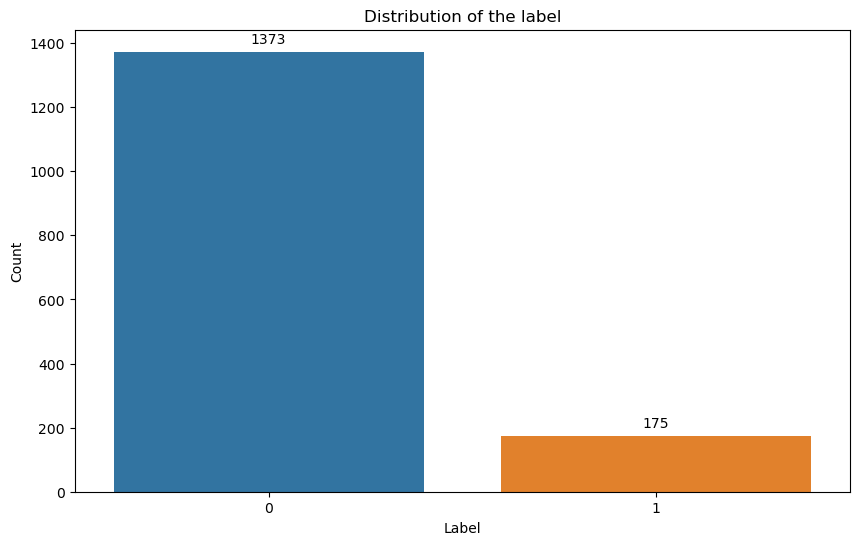

In [100]:
# Check the distribution of the label
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='label', data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title("Distribution of the label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

**Numerical Variables**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37004\2546724837.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_37004\2546724837.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_37004\2546724837.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_37004\2546724837.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


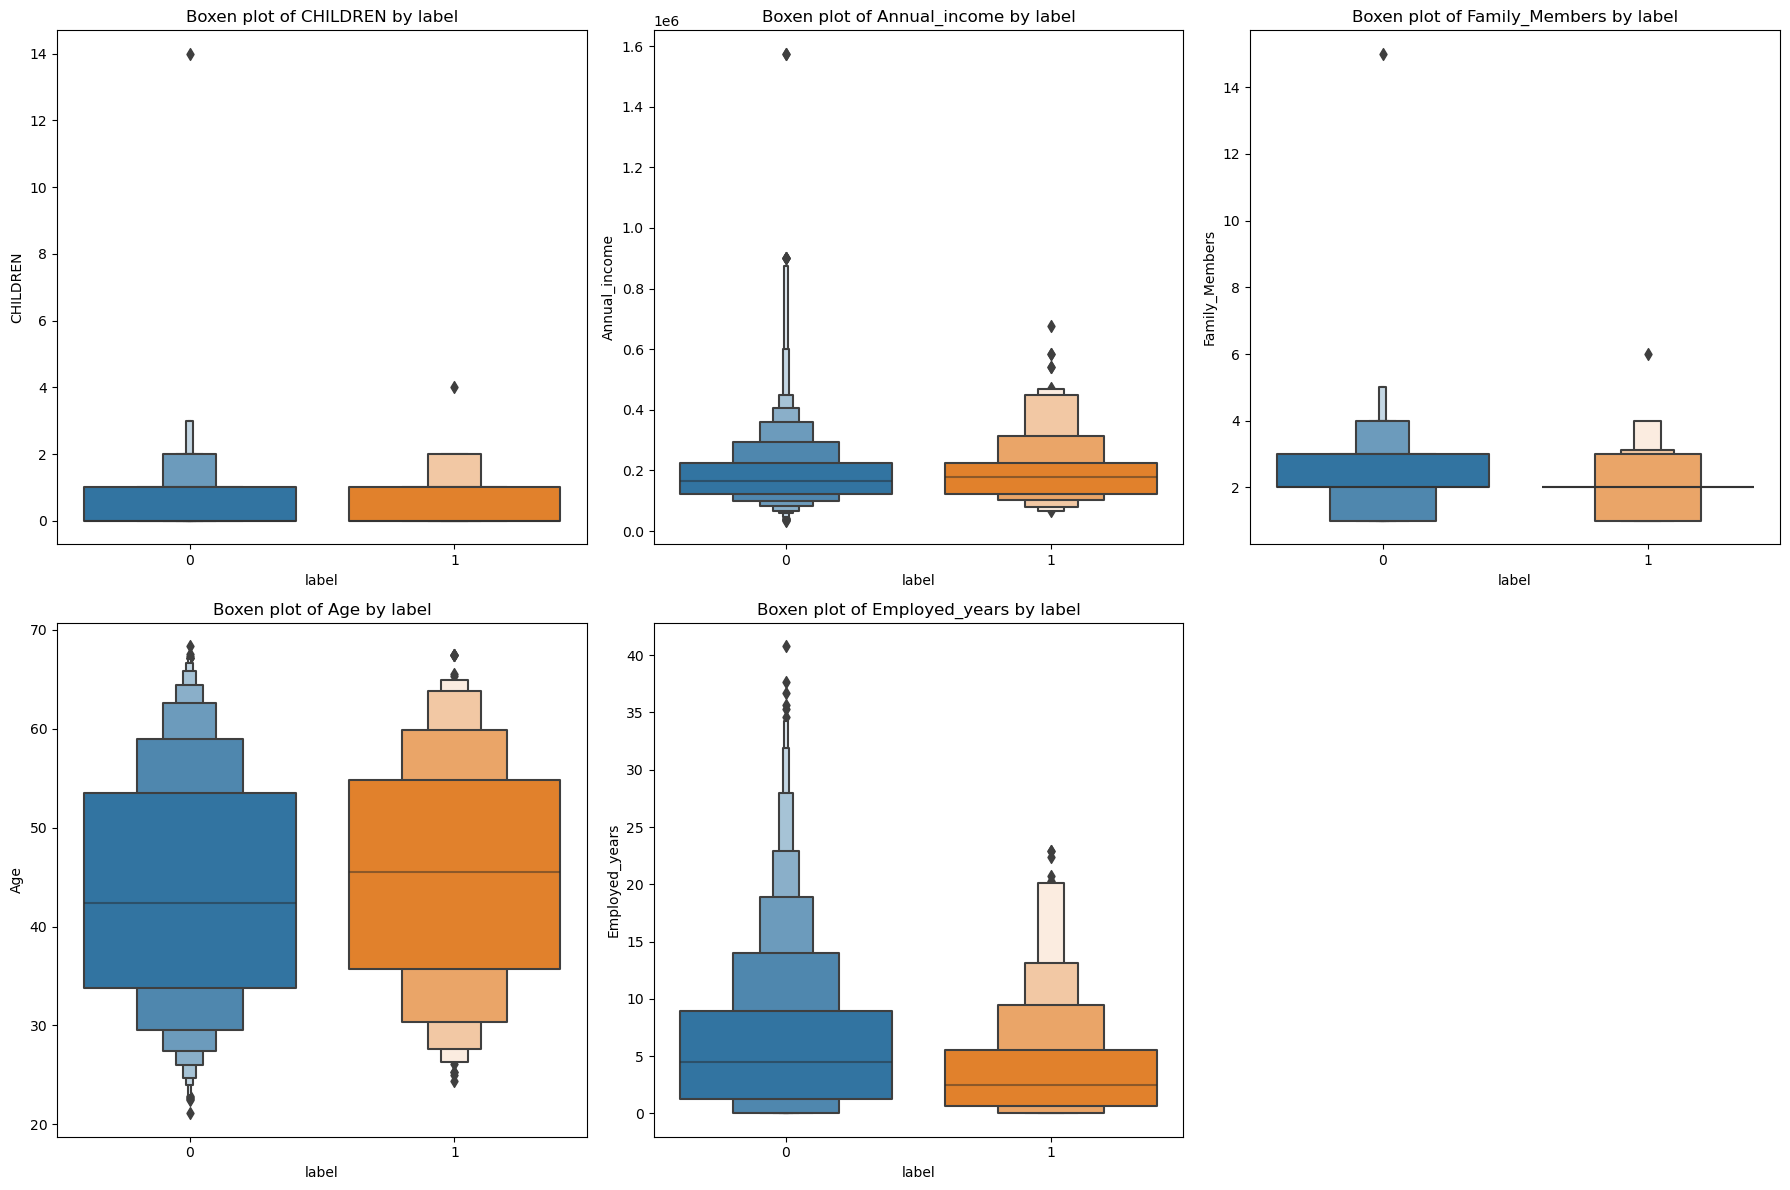

In [101]:
# Select numeric columns from df
numeric_vars = df.select_dtypes(include=['number']).columns.drop('Ind_ID')

# Creating boxen plots for each numeric variable
plt.figure(figsize=(18, 12))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxenplot(x='label', y=var, data=df)
    plt.title(f'Boxen plot of {var} by label')
    plt.xlabel('label')
    plt.ylabel(var)
    plt.tight_layout()

plt.show()

**Categorical Variables**

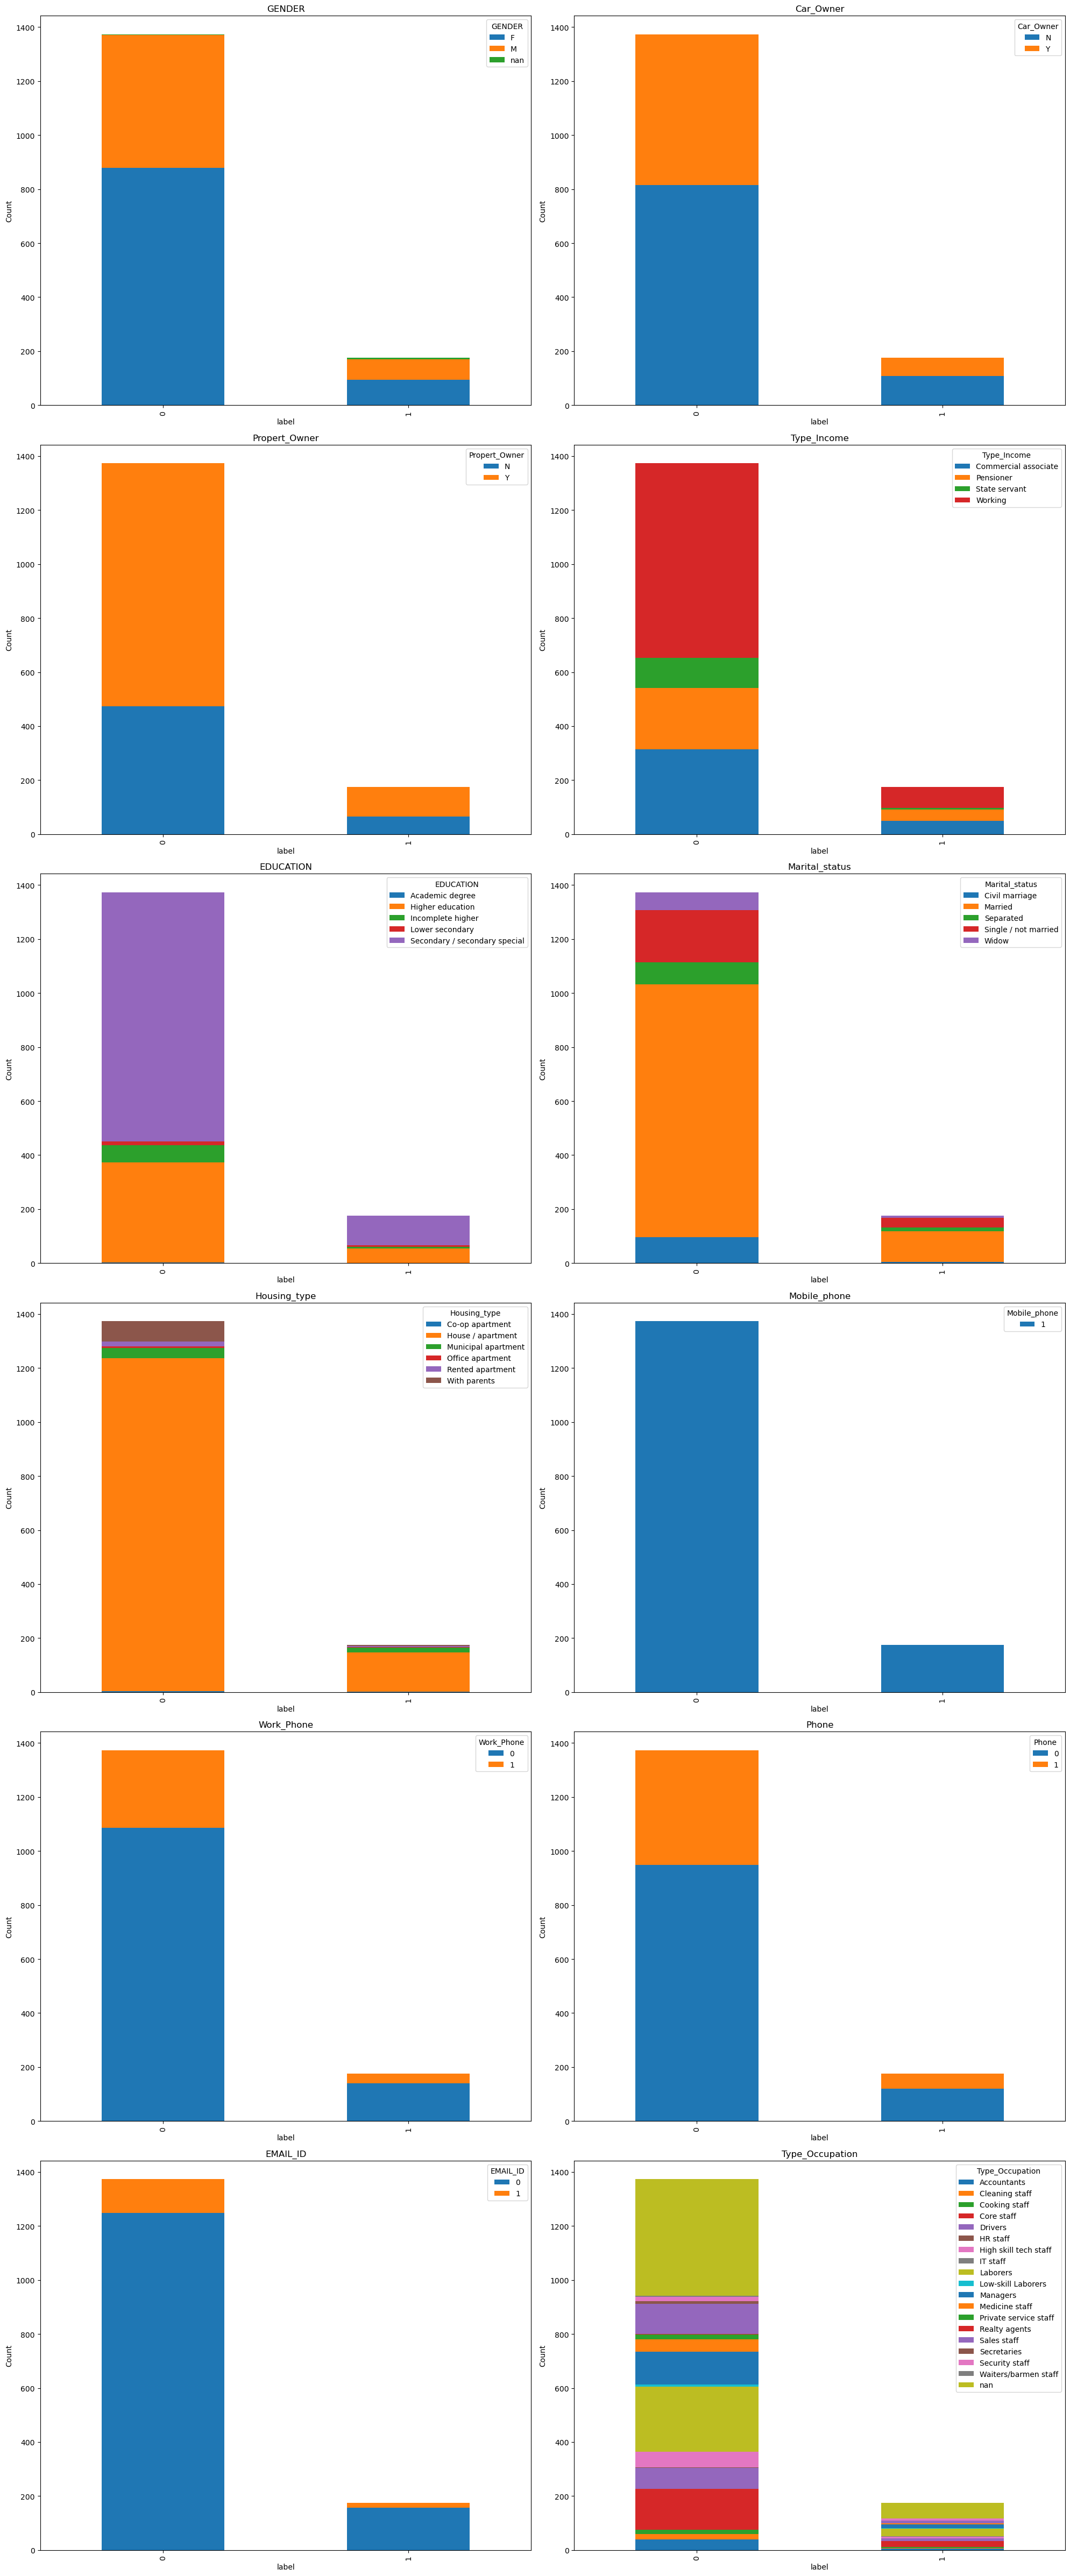

In [102]:
# Select categorical columns from df excluding 'label'
categorical_vars = df.select_dtypes(include=['object']).columns
categorical_vars = categorical_vars[categorical_vars != 'label']  # Exclude 'label'

# Create subplots based on the number of categorical variables
fig, axes = plt.subplots((len(categorical_vars) + 1) // 2, 2, figsize=(20, len(categorical_vars) * 4))
axes = axes.flatten()

# Plot stacked bar chart for each categorical variable
for i, var in enumerate(categorical_vars):
    if var in df.columns:
        # Count occurrences including NaN
        counts = df.groupby(['label', var], dropna=False).size().unstack(fill_value=0)
        counts.plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_title(var)
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel('label')
    else:
        axes[i].axis('off')

# Turn off any remaining empty axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


**Correlation Heat Map**

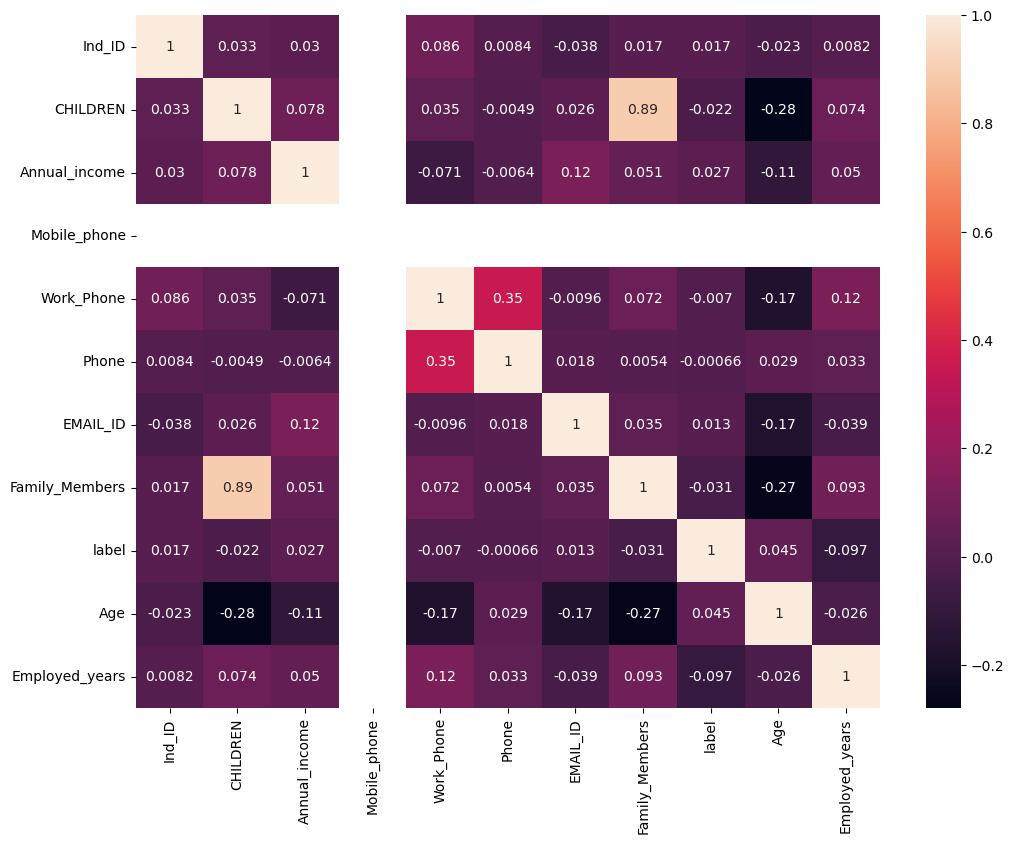

In [103]:
# Correlation matrix heatmap
df_corr = df.astype("float64",errors='ignore')
df_corr = df_corr.select_dtypes(exclude="object")
plt.subplots(figsize=(12,9))
sns.heatmap(df_corr.corr(), annot=True)
plt.show()

## 4. Data Preparation
### a. Reformat Categorical Variables :

**Proses Reformat Categorical Variables yang Dilakukan:**
1. Pada variabel marital status, kategori widow dan separated digabung menjadi satu kategori separated karena keduanya serupa dan proporsinya sedikit. Selain itu, kategori lainnya dibiarkan tetap sama.
2. Pada variabel housing type, kategori Co-op apartment dan office apartment digabung menjadi satu kategori office apartment karena keduanya serupa dan proporsinya sedikit. Kategori lainnya tetap dibiarkan seperti semula.
3. Pemetaan kategori pada variabel type occupation dilakukan sebagai berikut: Core staff diubah menjadi Core Staff, High skill tech staff, Managers, IT staff, dan HR staff diubah menjadi Technical, Drivers, Security staff, dan Cleaning staff diubah menjadi Operational, Cooking staff, Sales staff, Waiters/barmen staff, dan Private service staff diubah menjadi Service, Accountants, Secretaries, dan Medicine staff diubah menjadi Administrative, serta Laborers dan Low-skill Laborers diubah menjadi Labor. Kategori Realty agents juga diubah menjadi Service.

**Marital_status**

In [104]:
def reformat_marital_status(status):
    if status in ['Married', 'Civil marriage']:
        return 'Married'
    elif status in ['Widow', 'Separated']:
        return 'Separated'
    else:
        return status

# Terapkan fungsi ke kolom Marital_status
df['Marital_status'] = df['Marital_status'].apply(reformat_marital_status)


**Housing_type**

In [105]:
def reformat_housing_type(house):
    if house in ['Co-op apartment']:
        return 'Office apartment'
    else:
        return house

# Terapkan fungsi ke kolom Housing_type
df['Housing_type'] = df['Housing_type'].apply(reformat_housing_type)


**Type_Occupation**

In [106]:
reformat_mapping = {
    'Core staff': 'Core Staff',
    'High skill tech staff': 'Technical',
    'Managers': 'Technical',
    'IT staff': 'Technical',
    'HR staff': 'Technical',
    'Drivers': 'Operational',
    'Security staff': 'Operational',
    'Cleaning staff': 'Operational',
    'Cooking staff': 'Service',
    'Sales staff': 'Service',
    'Waiters/barmen staff': 'Service',
    'Private service staff': 'Service',
    'Accountants': 'Administrative',
    'Secretaries': 'Administrative',
    'Medicine staff': 'Administrative',
    'Laborers': 'Labor',
    'Low-skill Laborers': 'Labor',
    'Realty agents': 'Service'
}

# Terapkan reformatting
df['Type_Occupation'] = df['Type_Occupation'].map(reformat_mapping)

### b. Handling Missing Value
Untuk variabel type occupation, kategori dengan type income yang berstatus pensioner diisi dengan nilai unknown. Sisa nilai yang hilang pada variabel kategorikal ditangani menggunakan Simple Imputer dalam pipeline, sedangkan nilai yang hilang pada variabel numerik diatasi dengan Iterative Imputer.



In [107]:
# Cek jumlah keberadaan missing value pada tiap kolom
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
Age                 22
Employed_years       0
dtype: int64

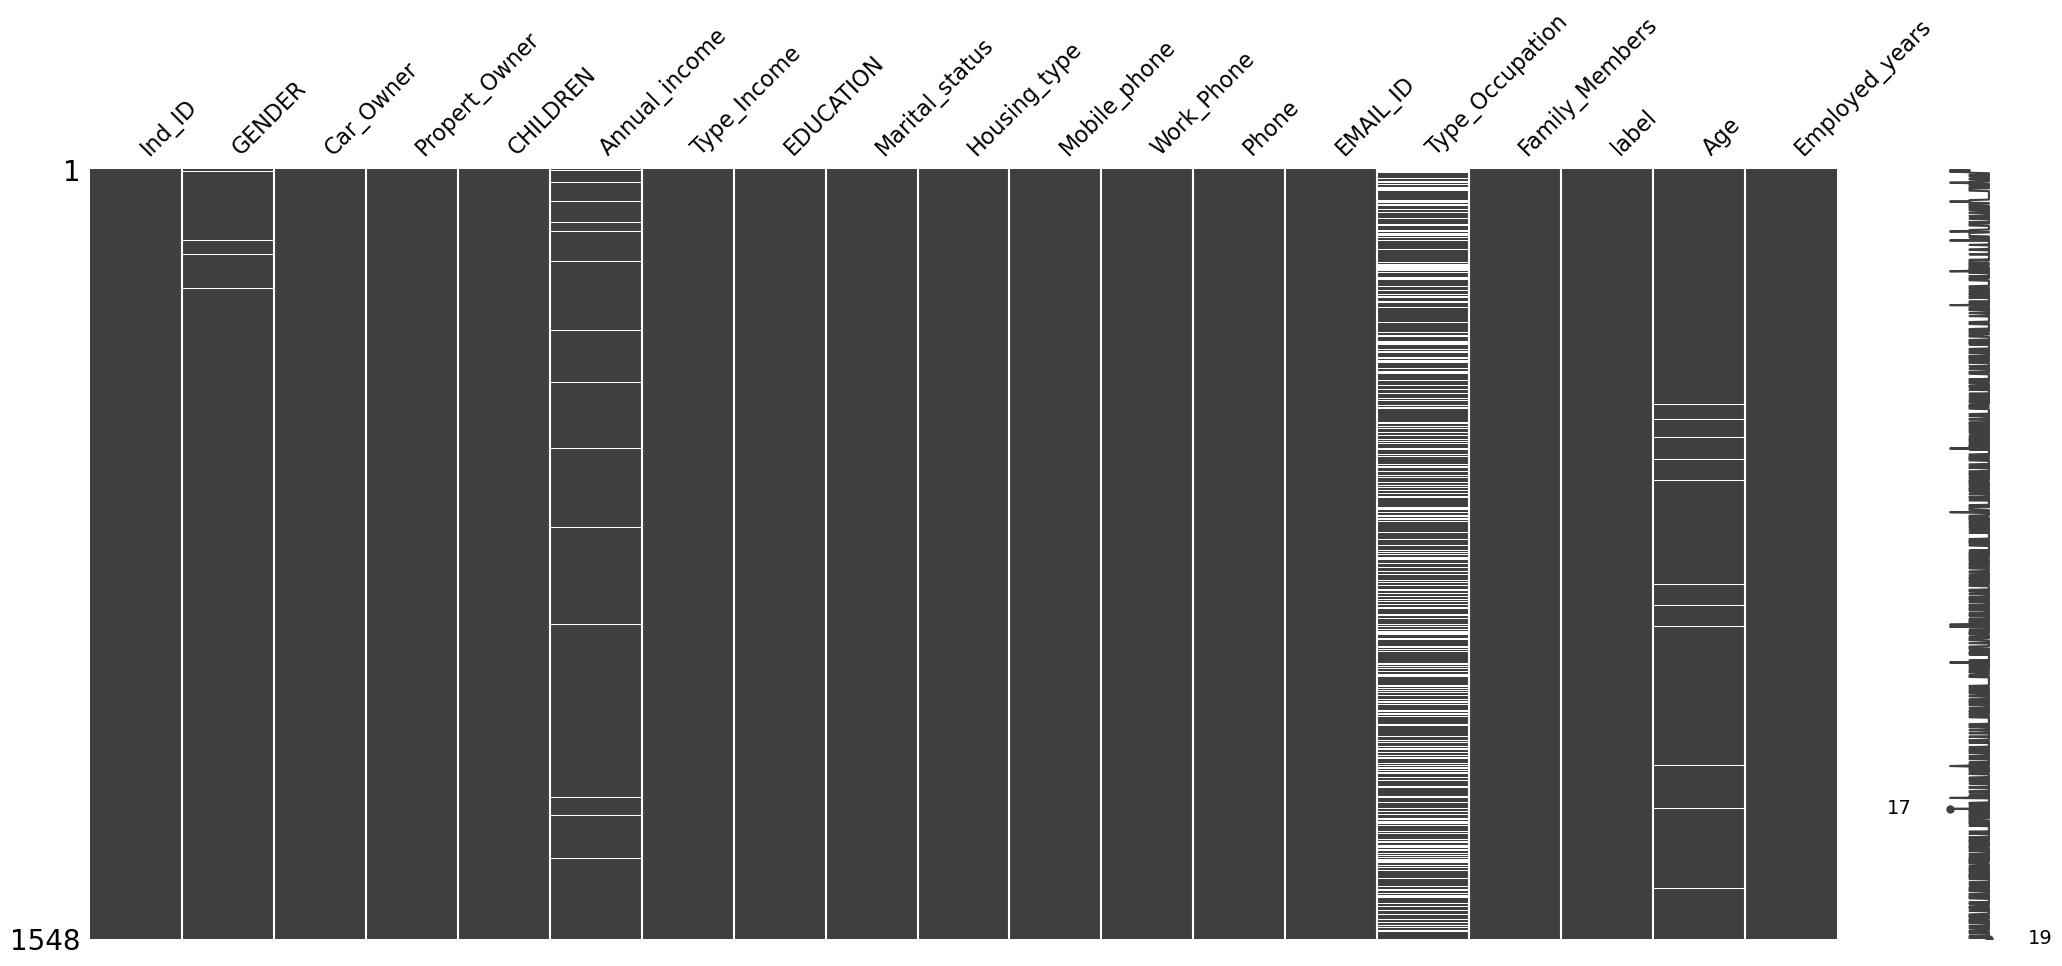

In [108]:
# Plot missing value
import missingno as msno

msno.matrix(df)
plt.show()

**Type_Occupation**



In [109]:
# Mengisi NaN di Type_Occupation dengan 'Other' untuk semua baris lainnya
df.loc[(df['Type_Occupation'].isna()) & (df['Type_Income'] == 'Pensioner'), 'Type_Occupation'] = 'Unknown'

# df.loc[df['Type_Occupation'].isna(), 'Type_Occupation'] = 'Other'

### c. Dropping Unnecessary Variables
Penghapusan variabel yang dianggap tidak perlu juga dilakukan. Berdasarkan peta korelasi, variabel mobile phone memiliki korelasi sempurna (nilai 1) dengan seluruh variabel lain, sehingga variabel ini dihapus. Selain itu, variabel type income juga dihapus karena dianggap redundan dan tumpang tindih dengan variabel type occupation, yang dianggap lebih memberikan wawasan yang jelas.

In [110]:
df.drop('Mobile_phone', axis=1, inplace=True)
# df.drop('CHILDREN', axis=1, inplace=True)
df.drop('Type_Income', axis=1, inplace=True)

### d. Pipeline
Pipeline yang digunakan mencakup beberapa langkah preprocessing: Iterative Imputer untuk menangani nilai yang hilang pada variabel numerik, StandardScaler untuk penskalaan fitur, Simple Imputer untuk mengisi nilai yang hilang pada variabel kategorikal, dan OneHot Encoder untuk mengonversi variabel kategorikal menjadi format yang dapat digunakan dalam model.

In [111]:
df['label'] = df['label'].astype(int)

In [112]:
# lihat kolom object
categorical =pd.DataFrame()
numerical =pd.DataFrame()

for cols in df.columns:
    if df[cols].dtype == "object":
        categorical[cols] = df[cols]
    else :
        numerical[cols] = df[cols]

In [113]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1548 non-null   int64  
 1   CHILDREN        1548 non-null   int64  
 2   Annual_income   1525 non-null   float64
 3   Family_Members  1548 non-null   int64  
 4   label           1548 non-null   int32  
 5   Age             1526 non-null   float64
 6   Employed_years  1548 non-null   float64
dtypes: float64(3), int32(1), int64(3)
memory usage: 78.7 KB


In [114]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   GENDER           1541 non-null   object
 1   Car_Owner        1548 non-null   object
 2   Propert_Owner    1548 non-null   object
 3   EDUCATION        1548 non-null   object
 4   Marital_status   1548 non-null   object
 5   Housing_type     1548 non-null   object
 6   Work_Phone       1548 non-null   object
 7   Phone            1548 non-null   object
 8   EMAIL_ID         1548 non-null   object
 9   Type_Occupation  1324 non-null   object
dtypes: object(10)
memory usage: 121.1+ KB


In [115]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, LabelEncoder

# Misalkan df adalah DataFrame Anda dan 'label' adalah kolom target
X = df.drop(columns=['Ind_ID', 'label'])  # Menghapus kolom Ind_ID dan label dari X
y = df['label']  # Menyimpan label dalam variabel y

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

# Identify categorical and numeric columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing untuk data kategori dengan SimpleImputer
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Tambahkan OneHotEncoder di sini
])

# Preprocessing untuk data numerik dengan IterativeImputer dan StandardScaler
numeric_preprocessor = Pipeline(steps=[
    ('imputer', IterativeImputer(random_state=0)),
    ('scaler', StandardScaler())
])

# Menggabungkan preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_preprocessor, numeric_columns),
        ('cat', categorical_preprocessor, categorical_columns)
    ])

preprocessor



ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer(random_state=0)),
                                                 ('scaler', StandardScaler())]),
                                 Index(['CHILDREN', 'Annual_income', 'Family_Members', 'Age', 'Employed_years'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation'],
      dtype='object'))])

In [116]:
# Transformasi data dengan pipeline
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

# Mendapatkan nama kolom
numeric_feature_names = numeric_columns
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_columns)

# Gabungkan nama kolom
all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# Membuat DataFrame dengan nama kolom
X_train_final = pd.DataFrame(X_train_processed, columns=all_feature_names)
X_val_final = pd.DataFrame(X_val_processed, columns=all_feature_names)

# Output hasil preprocessing akhir
print("X_train_final shape:", X_train_final.shape)
print("X_val_final shape:", X_val_final.shape)

X_train_final shape: (1238, 37)
X_val_final shape: (310, 37)


In [117]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1238 entries, 438 to 393
Series name: label
Non-Null Count  Dtype
--------------  -----
1238 non-null   int32
dtypes: int32(1)
memory usage: 14.5 KB


## 5. Modelling

- Sebelum dilakukan pemodelan, langkah pertama adalah menangani ketidakseimbangan data karena distribusi label antara kelas 0 dan 1 sangat tidak seimbang. Untuk mengatasi hal ini, dilakukan oversampling menggunakan metode SMOTE, SMOTE-Tomek, dan ADASYN. Metode SMOTE-Tomek dipilih karena efektif dalam mengurangi noise dan mengatasi overfitting dengan menghapus contoh yang tidak relevan, sedangkan ADASYN dipilih karena dapat menghasilkan sampel sintetis yang lebih relevan di sekitar area minoritas yang sulit diprediksi.

- Selanjutnya, pemodelan dilakukan dengan mencoba beberapa model, yaitu Logistic Regression dengan parameter max_iter=1000, Logistic RegressionCV dengan max_iter=10000, Gradient Boosting Classifier, HistGradientBoosting Classifier, CatBoost Classifier dengan logging_level='Silent', XGBClassifier, BernoulliNB, GaussianNB, KNeighborsClassifier, dan ExtraTreesClassifier. Fokus utama dalam evaluasi adalah pada metrik akurasi untuk menentukan performa masing-masing model karena akurasi memberikan gambaran umum tentang seberapa sering model membuat prediksi yang benar dibandingkan dengan total prediksi. Dalam konteks ini, akurasi membantu menilai seberapa baik model dapat membedakan antara kelas 0 dan 1 setelah penanganan ketidakseimbangan data. Metrik ini penting karena menunjukkan kemampuan model dalam memberikan hasil yang benar secara keseluruhan, yang sangat relevan dalam aplikasi di mana hasil klasifikasi yang akurat adalah kunci.

**Handling Imbalance Data**
1. SMOTE 
2. Using SMOTETomek
3. Using ADASYN

**SMOTE**

In [164]:
from imblearn.over_sampling import SMOTE

# Balancing the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

In [165]:
print(X_train_final.shape)
print(y_train.shape)
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(1238, 37)
(1238,)
(2196, 37)
(2196,)


In [166]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Membuat fungsi untuk mengevaluasi semua model secara otomatis
def all_model(list_model, X_train_resampled, X_val_final, y_train_resampled, y_val):
    # List kosong untuk menyimpan semua hasil pengukuran
    result = []
    for model in list_model:
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_val_final)
        
        # Hitung nilai berdasarkan model yang sudah di train / fit dan hasil prediksinya
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')

        # Kumpulkan nilai-nilai di atas menjadi satu
        hasil = {
            'Model': type(model).__name__,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Precision': precision,
            'Recall': recall
        }

        # Simpan nilai model ini dalam list result
        result.append(hasil)
    
    # Ubah menjadi dataframe
    result_all = pd.DataFrame(result)

    return result_all

# Tuliskan semua model yang ingin digunakan beserta parameter di dalamnya
list_of_model = [
    LogisticRegression(max_iter=1000),
    LogisticRegressionCV(max_iter=10000),
    GradientBoostingClassifier(random_state=26),
    HistGradientBoostingClassifier(random_state=26),
    CatBoostClassifier(random_state=26, logging_level='Silent'),
    XGBClassifier(random_state=26),
    BernoulliNB(),
    GaussianNB(),
    KNeighborsClassifier(),
    ExtraTreesClassifier(random_state=26)
]


In [167]:
df_result = all_model(list_of_model, X_train_resampled, X_val_final, y_train_resampled, y_val)
df_result

,Model,Accuracy,F1 Score,Precision,Recall
0,LogisticRegression,0.580645,0.656632,0.847614,0.580645
1,LogisticRegressionCV,0.580645,0.656632,0.847614,0.580645
2,GradientBoostingClassifier,0.870968,0.858997,0.850912,0.870968
3,HistGradientBoostingClassifier,0.912903,0.905638,0.903433,0.912903
4,CatBoostClassifier,0.909677,0.901298,0.898911,0.909677
5,XGBClassifier,0.906452,0.898648,0.895627,0.906452
6,BernoulliNB,0.629032,0.696496,0.826881,0.629032
7,GaussianNB,0.238710,0.260416,0.824907,0.238710
8,KNeighborsClassifier,0.703226,0.754070,0.847904,0.703226
9,ExtraTreesClassifier,0.909677,0.901298,0.898911,0.909677


**SMOTETomek**

In [118]:
from imblearn.combine import SMOTETomek

# Balancing the training data using SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_final, y_train)

In [119]:
print(X_train_final.shape)
print(y_train.shape)
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(1238, 37)
(1238,)
(2184, 37)
(2184,)


In [120]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Membuat fungsi untuk mengevaluasi semua model secara otomatis
def all_model(list_model, X_train_resampled, X_val_final, y_train_resampled, y_val):
    # List kosong untuk menyimpan semua hasil pengukuran
    result = []
    for model in list_model:
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_val_final)
        
        # Hitung nilai berdasarkan model yang sudah di train / fit dan hasil prediksinya
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')

        # Kumpulkan nilai-nilai di atas menjadi satu
        hasil = {
            'Model': type(model).__name__,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Precision': precision,
            'Recall': recall
        }

        # Simpan nilai model ini dalam list result
        result.append(hasil)
    
    # Ubah menjadi dataframe
    result_all = pd.DataFrame(result)

    return result_all

# Tuliskan semua model yang ingin digunakan beserta parameter di dalamnya
list_of_model = [
    LogisticRegression(max_iter=1000),
    LogisticRegressionCV(max_iter=10000),
    GradientBoostingClassifier(random_state=26),
    HistGradientBoostingClassifier(random_state=26),
    CatBoostClassifier(random_state=26, logging_level='Silent'),
    XGBClassifier(random_state=26),
    BernoulliNB(),
    GaussianNB(),
    KNeighborsClassifier(),
    ExtraTreesClassifier(random_state=26)
]


In [121]:
df_result = all_model(list_of_model, X_train_resampled, X_val_final, y_train_resampled, y_val)
df_result

,Model,Accuracy,F1 Score,Precision,Recall
0,LogisticRegression,0.583871,0.659395,0.848095,0.583871
1,LogisticRegressionCV,0.583871,0.659395,0.848095,0.583871
2,GradientBoostingClassifier,0.848387,0.845404,0.842604,0.848387
3,HistGradientBoostingClassifier,0.919355,0.911090,0.910684,0.919355
4,CatBoostClassifier,0.912903,0.905638,0.903433,0.912903
5,XGBClassifier,0.909677,0.904498,0.901761,0.909677
6,BernoulliNB,0.629032,0.696496,0.826881,0.629032
7,GaussianNB,0.238710,0.260416,0.824907,0.238710
8,KNeighborsClassifier,0.706452,0.756488,0.848439,0.706452
9,ExtraTreesClassifier,0.909677,0.901298,0.898911,0.909677


In [122]:
print("Train columns:", X_train_resampled.columns)
print("Validation columns:", X_val.columns)


Train columns: Index(['CHILDREN', 'Annual_income', 'Family_Members', 'Age', 'Employed_years',
       'GENDER_F', 'GENDER_M', 'Car_Owner_N', 'Car_Owner_Y', 'Propert_Owner_N',
       'Propert_Owner_Y', 'EDUCATION_Academic degree',
       'EDUCATION_Higher education', 'EDUCATION_Incomplete higher',
       'EDUCATION_Lower secondary', 'EDUCATION_Secondary / secondary special',
       'Marital_status_Married', 'Marital_status_Separated',
       'Marital_status_Single / not married', 'Housing_type_House / apartment',
       'Housing_type_Municipal apartment', 'Housing_type_Office apartment',
       'Housing_type_Rented apartment', 'Housing_type_With parents',
       'Work_Phone_0', 'Work_Phone_1', 'Phone_0', 'Phone_1', 'EMAIL_ID_0',
       'EMAIL_ID_1', 'Type_Occupation_Administrative',
       'Type_Occupation_Core Staff', 'Type_Occupation_Labor',
       'Type_Occupation_Operational', 'Type_Occupation_Service',
       'Type_Occupation_Technical', 'Type_Occupation_Unknown'],
      dtype='obje

In [123]:
print(X_train_resampled.dtypes)
print(X_val.dtypes)


CHILDREN                                   float64
Annual_income                              float64
Family_Members                             float64
Age                                        float64
Employed_years                             float64
GENDER_F                                   float64
GENDER_M                                   float64
Car_Owner_N                                float64
Car_Owner_Y                                float64
Propert_Owner_N                            float64
Propert_Owner_Y                            float64
EDUCATION_Academic degree                  float64
EDUCATION_Higher education                 float64
EDUCATION_Incomplete higher                float64
EDUCATION_Lower secondary                  float64
EDUCATION_Secondary / secondary special    float64
Marital_status_Married                     float64
Marital_status_Separated                   float64
Marital_status_Single / not married        float64
Housing_type_House / apartment 

**ADASYN**

In [124]:
from imblearn.over_sampling import ADASYN

# Mengaplikasikan ADASYN untuk oversampling
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_final, y_train)

In [125]:
print(X_train_final.shape)
print(y_train.shape)
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(1238, 37)
(1238,)
(2187, 37)
(2187,)


In [126]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Membuat fungsi untuk mengevaluasi semua model secara otomatis
def all_model(list_model, X_train_resampled, X_val_final, y_train_resampled, y_val):
    # List kosong untuk menyimpan semua hasil pengukuran
    result = []
    for model in list_model:
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_val_final)
        
        # Hitung nilai berdasarkan model yang sudah di train / fit dan hasil prediksinya
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')

        # Kumpulkan nilai-nilai di atas menjadi satu
        hasil = {
            'Model': type(model).__name__,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Precision': precision,
            'Recall': recall
        }

        # Simpan nilai model ini dalam list result
        result.append(hasil)
    
    # Ubah menjadi dataframe
    result_all = pd.DataFrame(result)

    return result_all

# Tuliskan semua model yang ingin digunakan beserta parameter di dalamnya
list_of_model = [
    LogisticRegression(max_iter=1000),
    LogisticRegressionCV(max_iter=10000),
    GradientBoostingClassifier(random_state=26),
    HistGradientBoostingClassifier(random_state=26),
    CatBoostClassifier(random_state=26, logging_level='Silent'),
    XGBClassifier(random_state=26),
    BernoulliNB(),
    GaussianNB(),
    KNeighborsClassifier(),
    ExtraTreesClassifier(random_state=26)
]


In [127]:
df_result = all_model(list_of_model, X_train_resampled, X_val_final, y_train_resampled, y_val)
df_result

,Model,Accuracy,F1 Score,Precision,Recall
0,LogisticRegression,0.558065,0.637006,0.844173,0.558065
1,LogisticRegressionCV,0.561290,0.640502,0.834334,0.561290
2,GradientBoostingClassifier,0.877419,0.868299,0.862071,0.877419
3,HistGradientBoostingClassifier,0.929032,0.921042,0.923243,0.929032
4,CatBoostClassifier,0.916129,0.909889,0.907844,0.916129
5,XGBClassifier,0.922581,0.915398,0.914910,0.922581
6,BernoulliNB,0.648387,0.711229,0.825820,0.648387
7,GaussianNB,0.225806,0.240769,0.817685,0.225806
8,KNeighborsClassifier,0.680645,0.737382,0.848585,0.680645
9,ExtraTreesClassifier,0.900000,0.891658,0.887821,0.900000


### **Model Terbaik**

In [128]:
from sklearn.metrics import classification_report

hgb = HistGradientBoostingClassifier(random_state=26)
hgb.fit(X_train_resampled,y_train_resampled)
y_pred = hgb.predict(X_val_final)
print(classification_report(y_pred,y_val,digits=6))

              precision    recall  f1-score   support

           0   0.985455  0.937716  0.960993       289
           1   0.485714  0.809524  0.607143        21

    accuracy                       0.929032       310
   macro avg   0.735584  0.873620  0.784068       310
weighted avg   0.951601  0.929032  0.937022       310



**Interpretasi:** <br>
Hasil pemodelan menunjukkan bahwa model dengan oversampling ADASYN dan menggunakan HistGradientBoosting Classifier mencapai akurasi tertinggi sebesar 0,929. Selain itu, model ini juga memperoleh skor F1 sebesar 0,921, precision sebesar 0,923, dan recall sebesar 0,929. 
1. Akurasi (Accuracy) 0,929: Ini berarti bahwa model memprediksi label yang benar sebesar 92,9% dari seluruh prediksi yang dilakukan. Akurasi adalah proporsi dari total prediksi yang benar dibandingkan dengan total prediksi yang dilakukan.
2. F1 Score 0,921: F1 Score adalah rata-rata harmonis dari precision dan recall. Dengan skor 0,921, ini menunjukkan keseimbangan yang baik antara precision dan recall, menandakan bahwa model tidak hanya akurat tetapi juga efektif dalam menangkap sebagian besar kasus positif.
3. Precision 0,923: Precision mengukur seberapa banyak dari semua prediksi positif yang benar-benar positif. Dengan precision sebesar 0,923, ini berarti bahwa 92,3% dari prediksi positif model benar-benar adalah positif. Precision yang tinggi menunjukkan bahwa model jarang membuat kesalahan dengan memberikan label positif yang salah.
4. Recall 0,929: Recall mengukur seberapa banyak dari semua kasus positif yang benar-benar berhasil ditangkap oleh model. Dengan recall sebesar 0,929, ini berarti bahwa model berhasil menangkap 92,9% dari semua kasus positif yang sebenarnya. Recall yang tinggi menunjukkan bahwa model sangat efektif dalam menemukan kasus positif yang ada.

Secara keseluruhan, hasil ini menunjukkan bahwa model dengan oversampling ADASYN dan HistGradientBoosting Classifier tidak hanya memiliki akurasi tinggi, tetapi juga kinerja yang baik dalam hal precision dan recall, menjadikannya sangat efektif dalam klasifikasi.

### Adds-On (Treshold-Moving Method) - Tidak Masuk dalam Laporan

Kami juga mencoba membuat model tanpa melakukan oversampling, dan menemukan bahwa model terbaik tetap menggunakan HistGradientBoosting Classifier. Selanjutnya, kami menerapkan metode threshold-moving. Mengingat kelas dari label 1 dan 0 sangat tidak seimbang, metode ini digunakan untuk mengatasi ketidakseimbangan kelas secara a posteriori dengan mengubah ambang batas keputusan model (dari default 0,5) dan memungkinkan penyesuaian terhadap ukuran kinerja yang diinginkan (metrik evaluasi yang ingin dioptimalkan). Hal ini dilakukan sambil mempertahankan distribusi kelas asli dan menghasilkan probabilitas posterior yang terkalibrasi. Dengan menggunakan metode threshold-moving, diperoleh ambang batas optimal adalah 0,46 dan model menunjukkan peningkatan pada metrik evaluasi Accuracy, Precision (Weighted), Recall (Weighted), dan F1 Score (Weighted) dibandingkan dengan model asli tanpa threshold moving.

**Namun, hasil model dengan metode threshold-moving ini tidak dimasukkan dalam laporan penelitian karena model dengan oversampling ADASYN tetap menunjukkan kinerja terbaik.**

In [160]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Membuat fungsi untuk mengevaluasi semua model secara otomatis
def all_model(list_model, X_train_processed, X_val_final, y_train, y_val):
    # List kosong untuk menyimpan semua hasil pengukuran
    result = []
    for model in list_model:
        model.fit(X_train_processed, y_train)
        y_pred = model.predict(X_val_final)
        
        # Hitung nilai berdasarkan model yang sudah di train / fit dan hasil prediksinya
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')

        # Kumpulkan nilai-nilai di atas menjadi satu
        hasil = {
            'Model': type(model).__name__,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Precision': precision,
            'Recall': recall
        }

        # Simpan nilai model ini dalam list result
        result.append(hasil)
    
    # Ubah menjadi dataframe
    result_all = pd.DataFrame(result)

    return result_all

# Tuliskan semua model yang ingin digunakan beserta parameter di dalamnya
list_of_model = [
    LogisticRegression(max_iter=1000),
    LogisticRegressionCV(max_iter=10000),
    GradientBoostingClassifier(random_state=26),
    HistGradientBoostingClassifier(random_state=26),
    CatBoostClassifier(random_state=26, logging_level='Silent'),
    XGBClassifier(random_state=26),
    BernoulliNB(),
    GaussianNB(),
    KNeighborsClassifier(),
    ExtraTreesClassifier(random_state=26)
]


In [161]:
df_result = all_model(list_of_model, X_train_processed, X_val_final, y_train, y_val)
df_result

d:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X ha

,Model,Accuracy,F1 Score,Precision,Recall
0,LogisticRegression,0.887097,0.834023,0.786941,0.887097
1,LogisticRegressionCV,0.887097,0.834023,0.786941,0.887097
2,GradientBoostingClassifier,0.890323,0.852030,0.861766,0.890323
3,HistGradientBoostingClassifier,0.922581,0.913864,0.914797,0.922581
4,CatBoostClassifier,0.903226,0.873312,0.898967,0.903226
5,XGBClassifier,0.922581,0.912205,0.915262,0.922581
6,BernoulliNB,0.887097,0.839943,0.845622,0.887097
7,GaussianNB,0.232258,0.243479,0.857674,0.232258
8,KNeighborsClassifier,0.861290,0.841124,0.827319,0.861290
9,ExtraTreesClassifier,0.922581,0.910408,0.916496,0.922581


In [162]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score
import numpy as np
import pandas as pd

# Asumsi Anda sudah memiliki data yang dibutuhkan: X_train_resampled, y_train_resampled, X_val_final, y_val

# 1. Melatih model optimal
hgb = HistGradientBoostingClassifier(random_state=26)
hgb.fit(X_train_processed, y_train)

# 2. Prediksi probabilitas untuk data validasi
y_val_probs = hgb.predict_proba(X_val_final)[:, 1]

# 3. Mencari threshold optimal
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = []

for threshold in thresholds:
    y_val_pred_threshold = (y_val_probs >= threshold).astype(int)
    f1 = f1_score(y_val, y_val_pred_threshold)
    f1_scores.append(f1)

# 4. Menentukan threshold terbaik berdasarkan F1-score
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal Threshold: {optimal_threshold}")

# 5. Membuat prediksi dengan threshold optimal
y_val_pred_optimal = (y_val_probs >= optimal_threshold).astype(int)

# 6. Evaluasi model menggunakan classification_report
report_optimal = classification_report(y_val, y_val_pred_optimal, output_dict=True)
accuracy_optimal = accuracy_score(y_val, y_val_pred_optimal)

# Mengambil nilai precision, recall, f1-score weighted dan accuracy untuk model dengan threshold moving
precision_optimal = report_optimal['weighted avg']['precision']
recall_optimal = report_optimal['weighted avg']['recall']
f1_weighted_optimal = report_optimal['weighted avg']['f1-score']

# 7. Evaluasi model asli tanpa threshold moving
y_val_pred_original = hgb.predict(X_val_final)

report_original = classification_report(y_val, y_val_pred_original, output_dict=True)
accuracy_original = accuracy_score(y_val, y_val_pred_original)

# Mengambil nilai precision, recall, f1-score weighted dan accuracy untuk model asli
precision_original = report_original['weighted avg']['precision']
recall_original = report_original['weighted avg']['recall']
f1_weighted_original = report_original['weighted avg']['f1-score']

# 8. Membuat DataFrame untuk membandingkan kedua model
comparison_df = pd.DataFrame({
    'Model': ['Original', 'Threshold Moving'],
    'Accuracy': [accuracy_original, accuracy_optimal],
    'Precision (Weighted)': [precision_original, precision_optimal],
    'Recall (Weighted)': [recall_original, recall_optimal],
    'F1 Score (Weighted)': [f1_weighted_original, f1_weighted_optimal]
})

# 9. Menampilkan hasil dalam bentuk DataFrame
comparison_df


d:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but HistGradientBoostingClassifier was fitted without feature names
  warnings.warn(


Optimal Threshold: 0.46


d:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but HistGradientBoostingClassifier was fitted without feature names
  warnings.warn(


,Model,Accuracy,Precision (Weighted),Recall (Weighted),F1 Score (Weighted)
0,Original,0.922581,0.914797,0.922581,0.913864
1,Threshold Moving,0.925806,0.918897,0.925806,0.918202


## 6. Evaluation

1. Pada bagian evaluasi, digunakan feature importance dan SHAP values untuk memahami pengaruh setiap fitur terhadap model. Berdasarkan hasil feature importance, fitur yang memiliki pengaruh paling tinggi terhadap prediksi model adalah annual income, family members, age, dan employed years. Hal ini menunjukkan bahwa keempat fitur tersebut memberikan kontribusi terbesar dalam menentukan probabilitas gagal bayar pinjaman pribadi.

2. Selanjutnya, SHAP values digunakan untuk mengevaluasi lebih lanjut pengaruh spesifik dari setiap fitur terhadap probabilitas gagal bayar pinjaman pribadi. Berdasarkan grafik pada Gambar 10(a), dapat dilihat bagaimana masing-masing faktor memengaruhi prediksi sepanjang sumbu horizontal. Warna merah pada grafik menunjukkan nilai yang tinggi untuk suatu fitur. Berdasarkan grafik SHAP value yang ditunjukkan, berikut adalah interpretasi dari pengaruh fitur-fitur terhadap probabilitas gagal bayar pinjaman pribadi:

- Employed_years:
Titik-titik berwarna merah cenderung berada di sebelah kiri sumbu vertikal, yang berasosiasi dengan label 0 (tidak gagal bayar). Hal ini menunjukkan bahwa semakin lama seseorang telah bekerja (employed years yang lebih tinggi), semakin kecil kemungkinan mereka untuk gagal membayar pinjaman. Dengan kata lain, durasi pekerjaan yang lebih lama dikaitkan dengan ketepatan dalam membayar pinjaman.
- Age:
Titik-titik berwarna merah (nilai tinggi untuk usia) cenderung berada di sebelah kanan sumbu vertikal, yang berasosiasi dengan label 1 (gagal bayar). Ini menunjukkan bahwa semakin tua usia seseorang, semakin besar kemungkinan mereka untuk gagal membayar pinjaman pribadi. Faktor usia tua ini mungkin berhubungan dengan peningkatan risiko kesehatan atau pengurangan pendapatan.
- Annual_income:
Meskipun ada beberapa titik merah (nilai tinggi untuk pendapatan tahunan) yang berada di sebelah kanan, sebagian besar titik merah cenderung berada di sebelah kiri sumbu vertikal. Ini mengindikasikan bahwa pendapatan tahunan yang lebih tinggi (annual income yang tinggi) cenderung mengurangi risiko gagal bayar. Artinya, orang dengan pendapatan tahunan yang lebih besar lebih mungkin mampu membayar pinjaman mereka.
- Family_Members:
Titik-titik ungu (yang mewakili nilai menengah untuk jumlah anggota keluarga) cenderung berada di sebelah kanan (gagal bayar). Ini menunjukkan bahwa memiliki jumlah anggota keluarga yang moderat mungkin berkaitan dengan risiko gagal bayar yang lebih tinggi. Ini bisa jadi karena tanggungan finansial yang tidak terlalu besar maupun terlalu kecil mungkin memiliki risiko keuangan tertentu yang berkontribusi terhadap kemungkinan gagal bayar.

Lebih detail mengenai pengaruh dari tiap fitur dapat dilihat pada Gambar di sebelah kanan, yang memberikan visualisasi mendalam tentang bagaimana setiap fitur memengaruhi prediksi model secara individual.

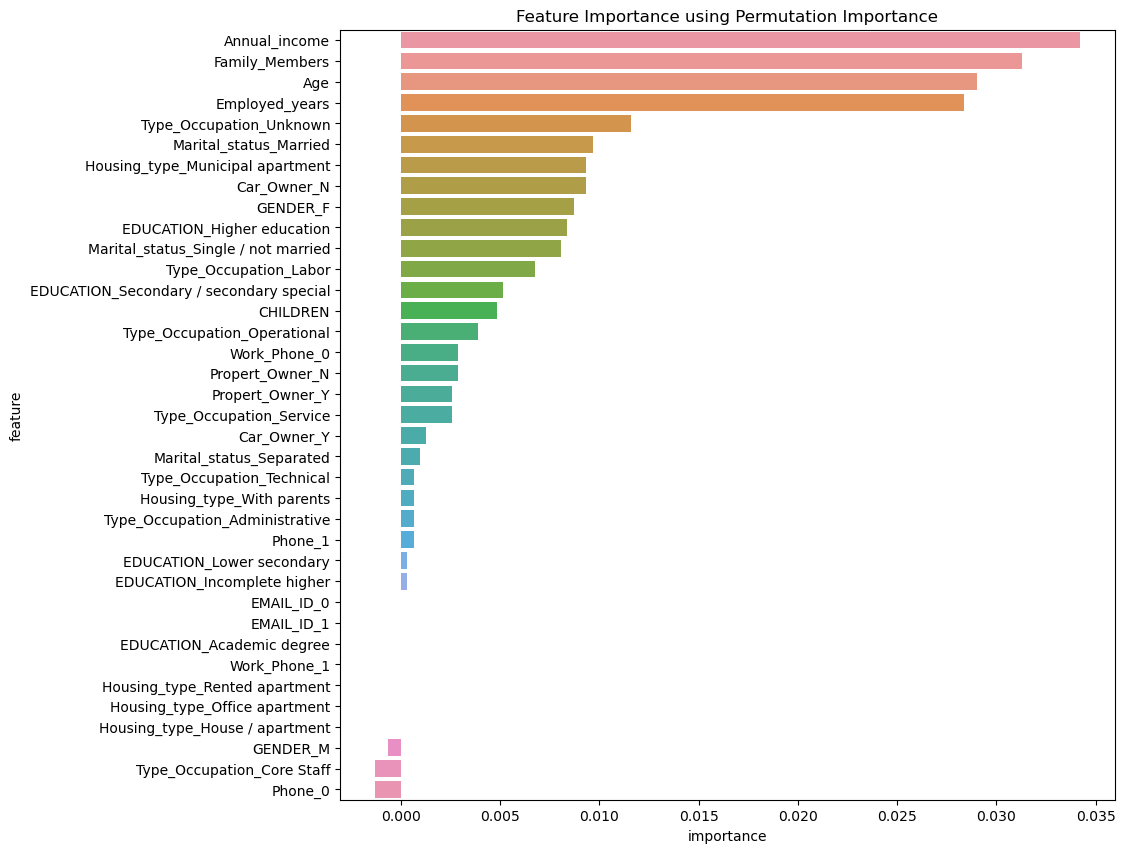

In [129]:
from sklearn.inspection import permutation_importance

# Hitung permutasi imporantasi
result = permutation_importance(hgb, X_val_final, y_val, n_repeats=10, random_state=42, n_jobs=-1)

# Mengubah hasil ke dalam DataFrame
feature_importance_df = pd.DataFrame({'feature': X_val_final.columns, 'importance': result.importances_mean})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot imporantasi fitur
plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance using Permutation Importance')
plt.show()


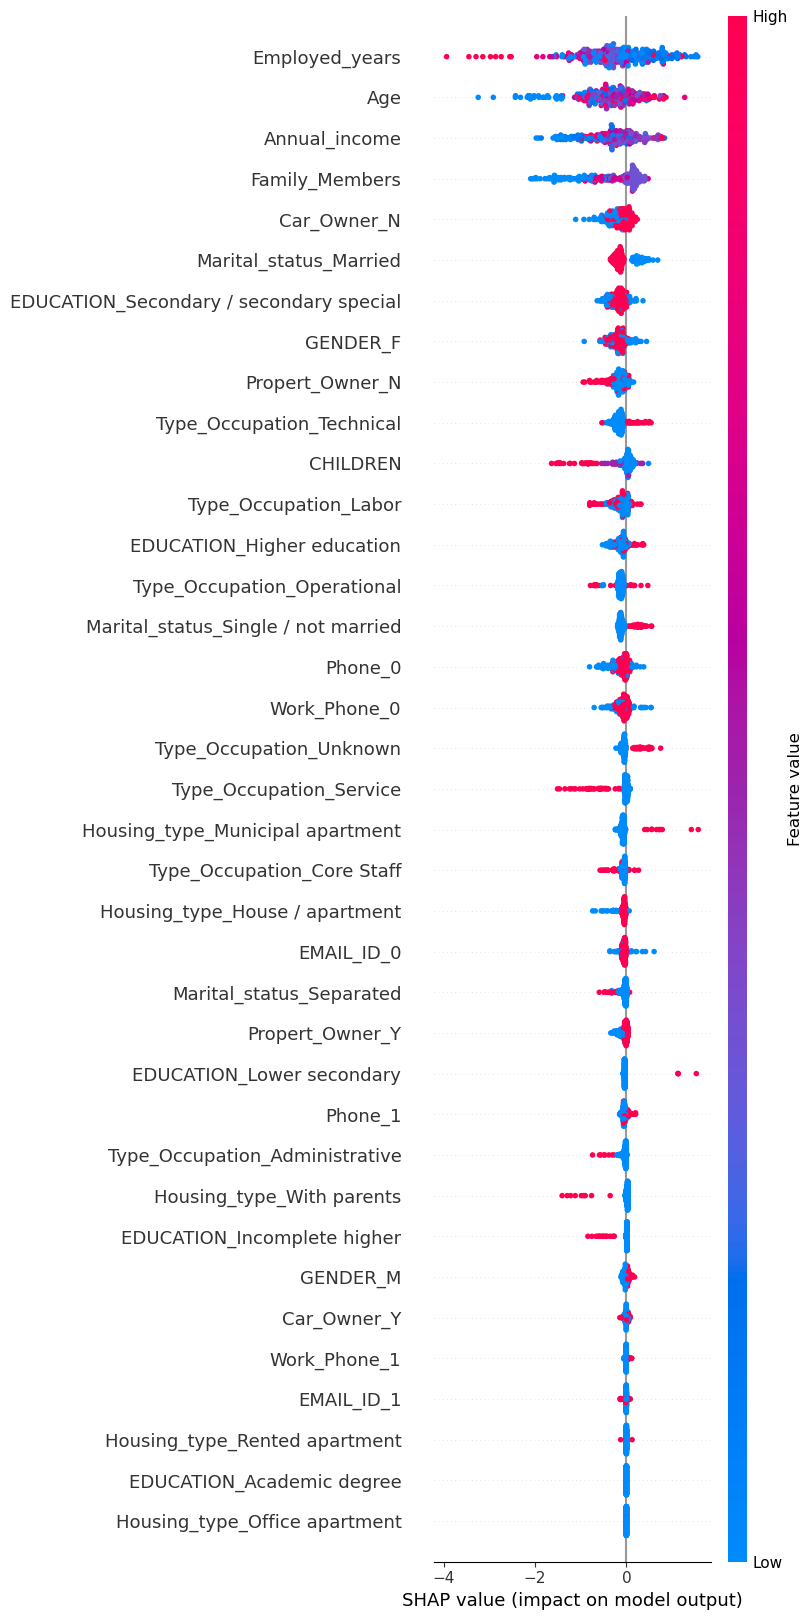

In [130]:
import shap
explainer = shap.Explainer(hgb)
shap_values = explainer.shap_values(X_val_final)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_val_final,max_display=50)


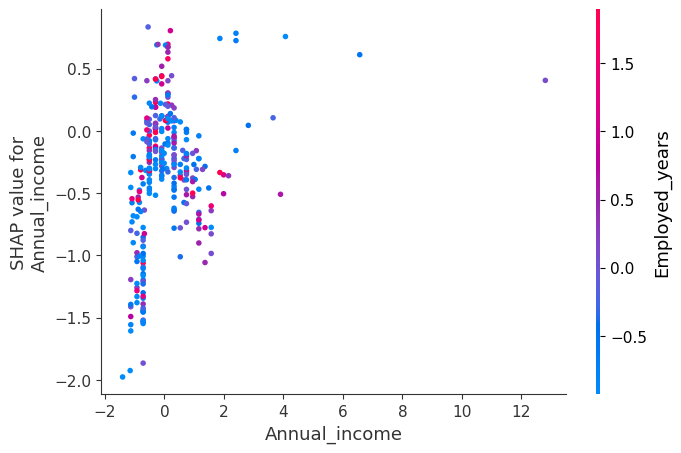

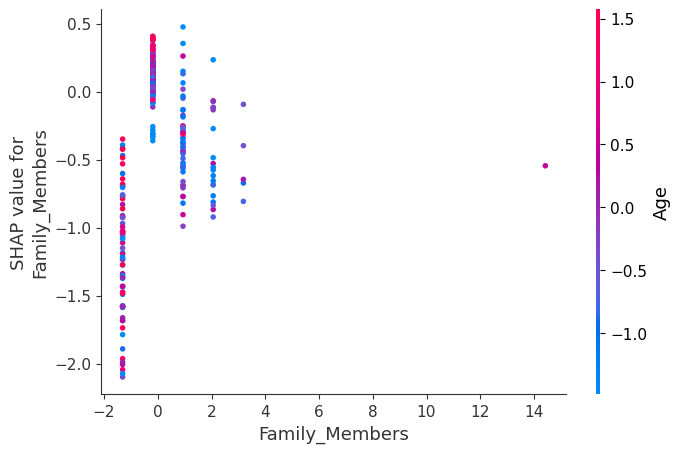

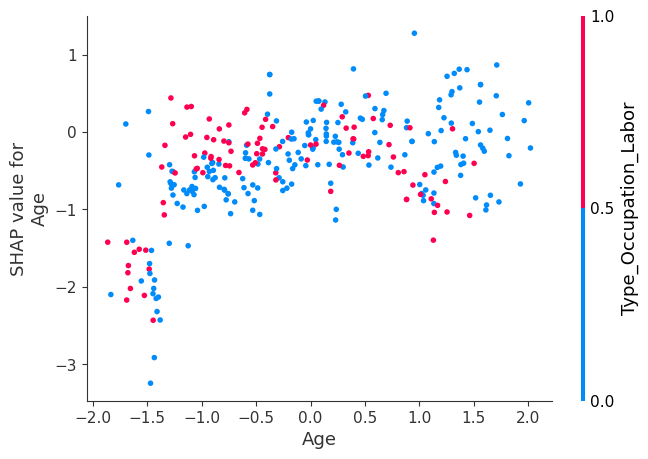

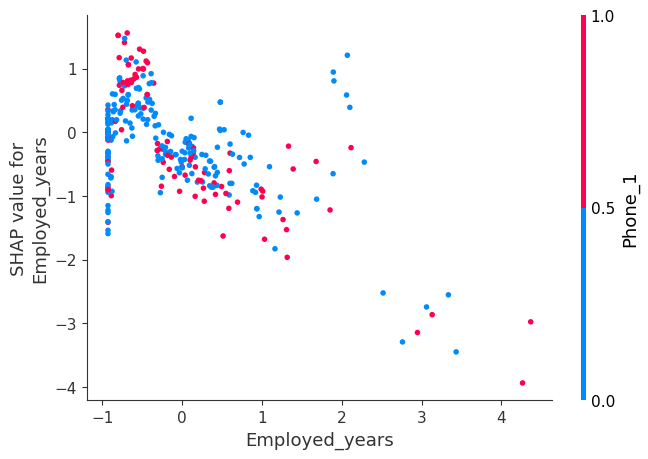

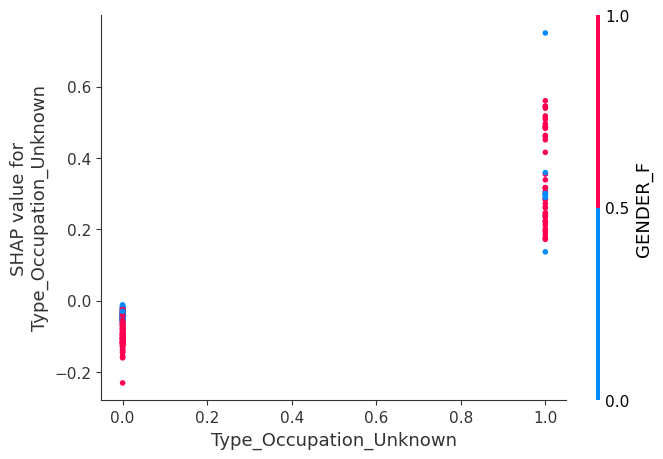

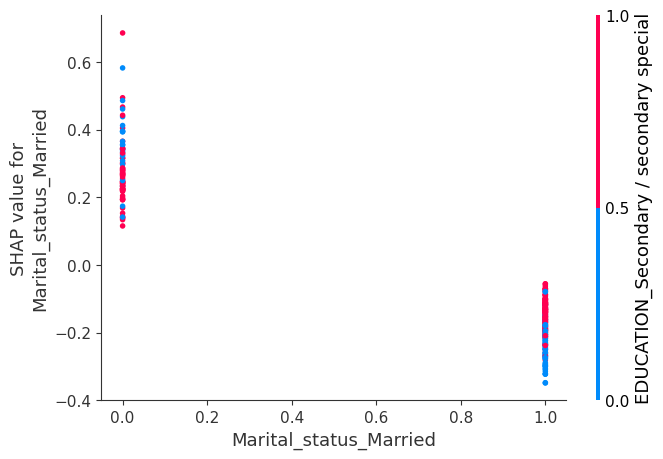

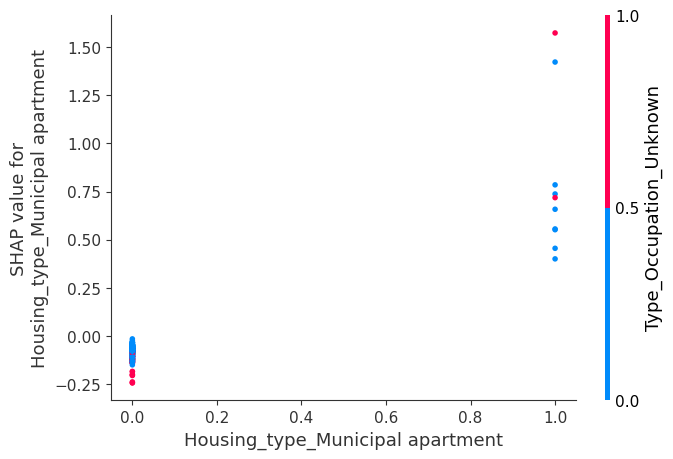

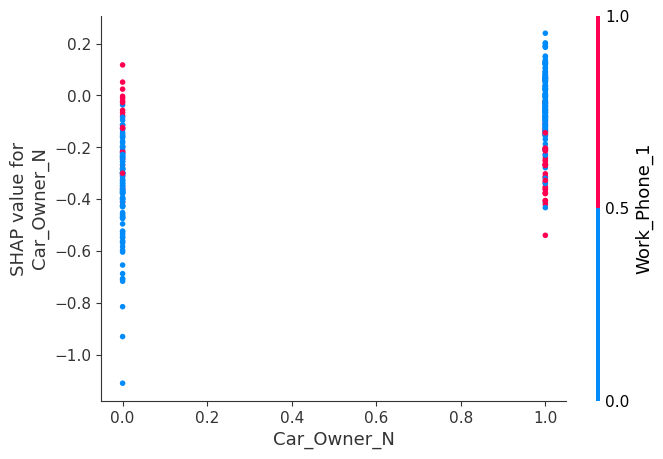

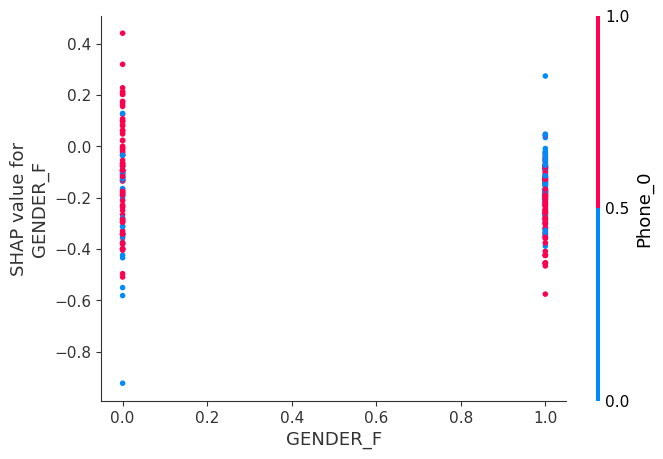

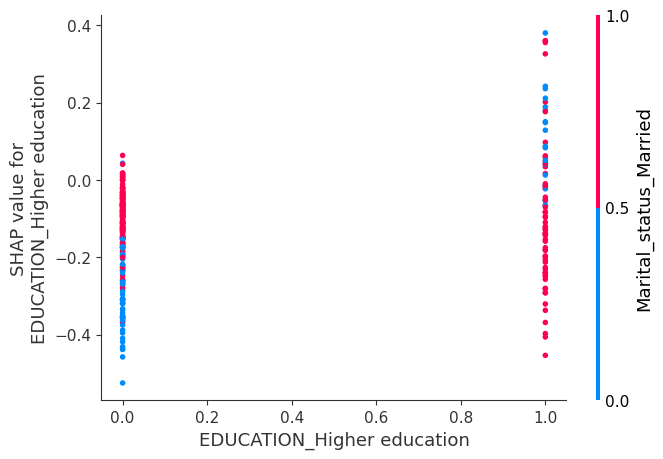

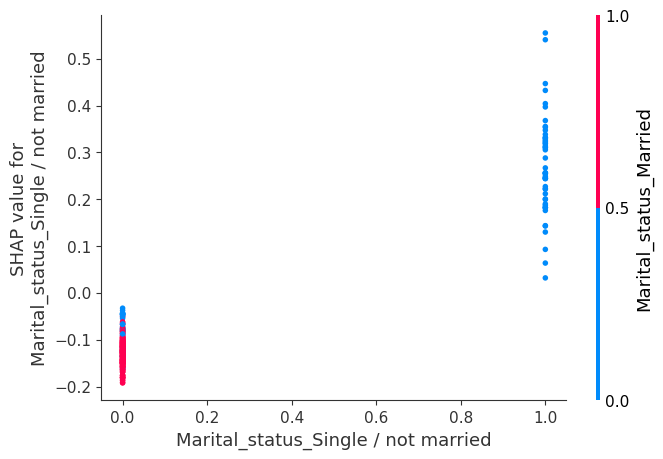

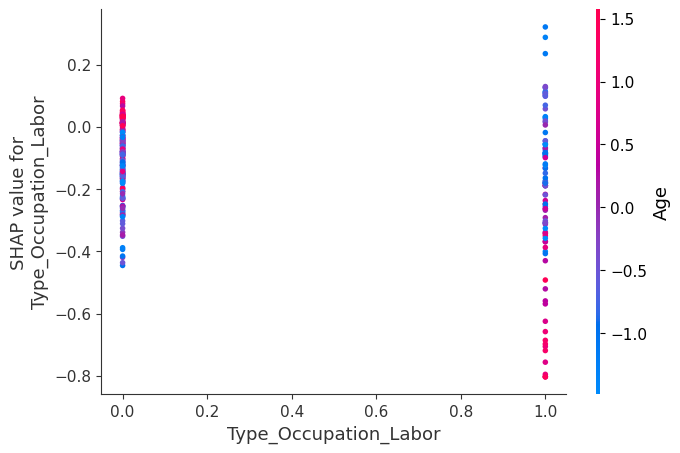

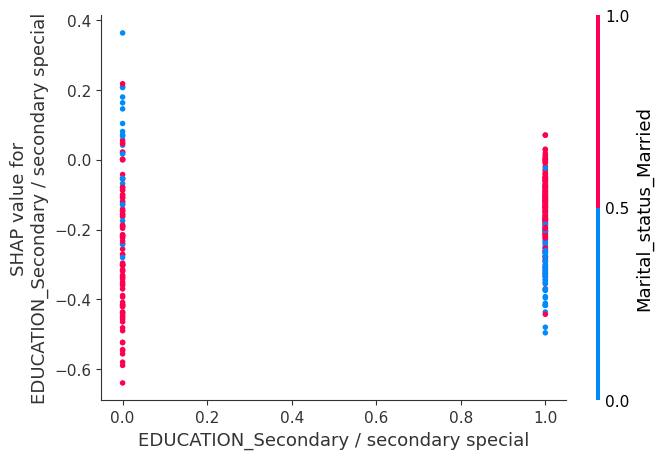

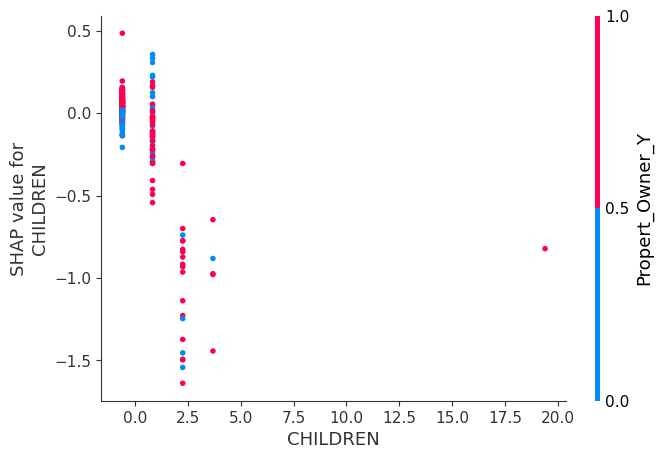

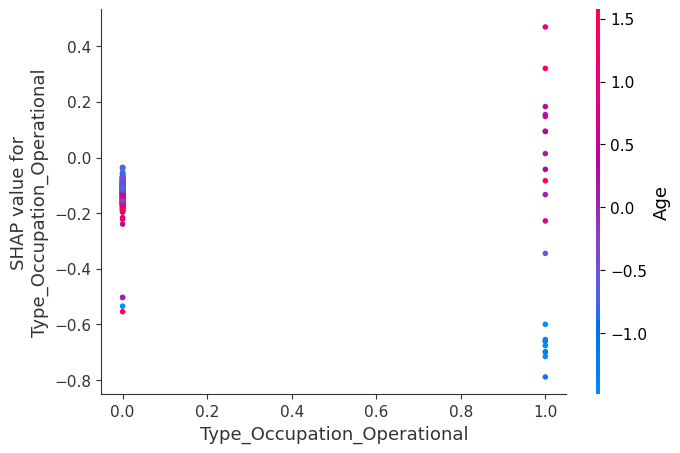

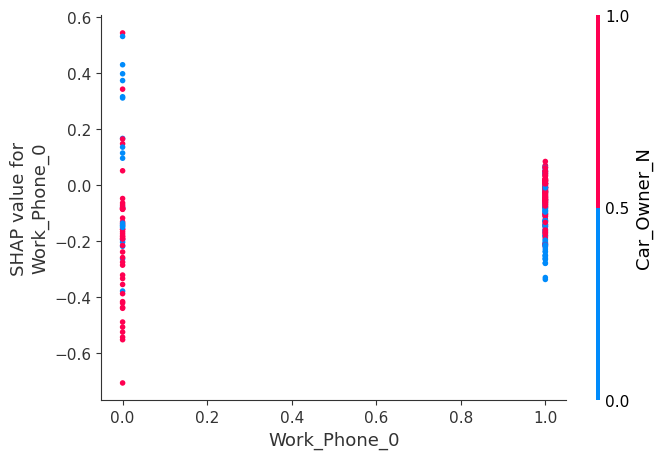

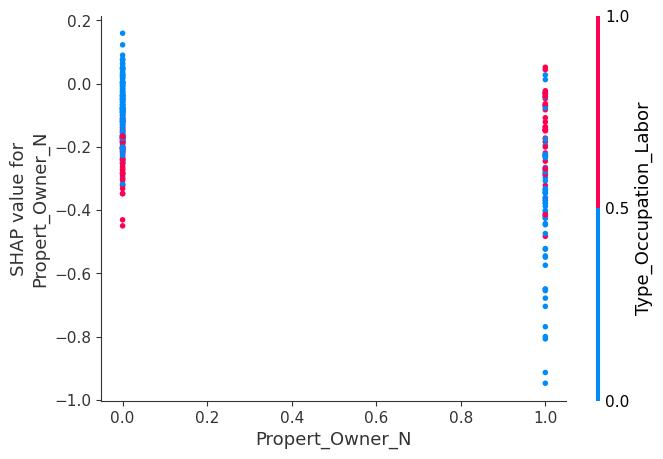

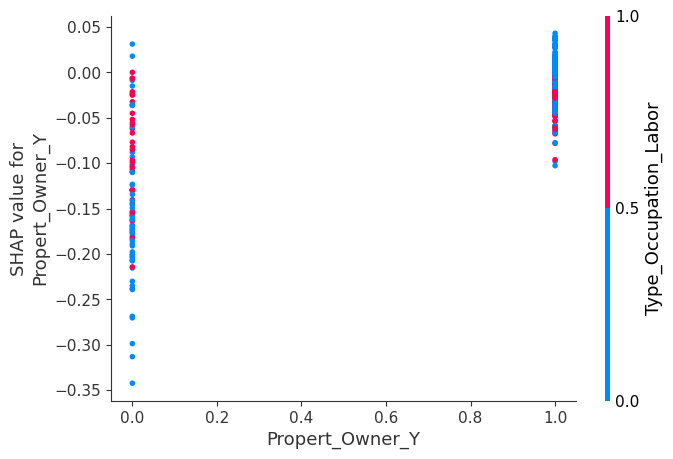

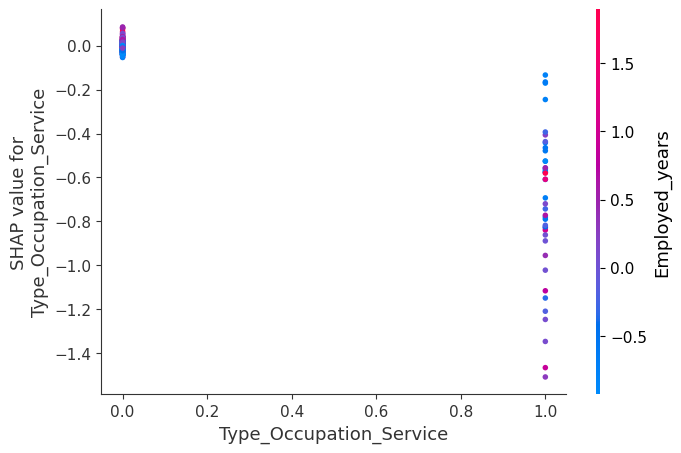

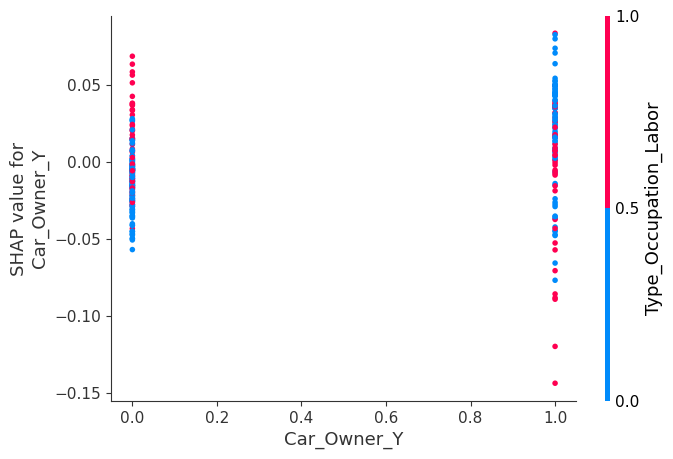

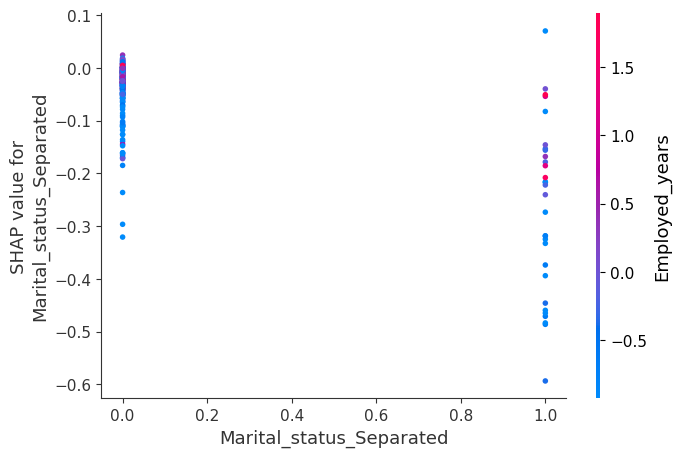

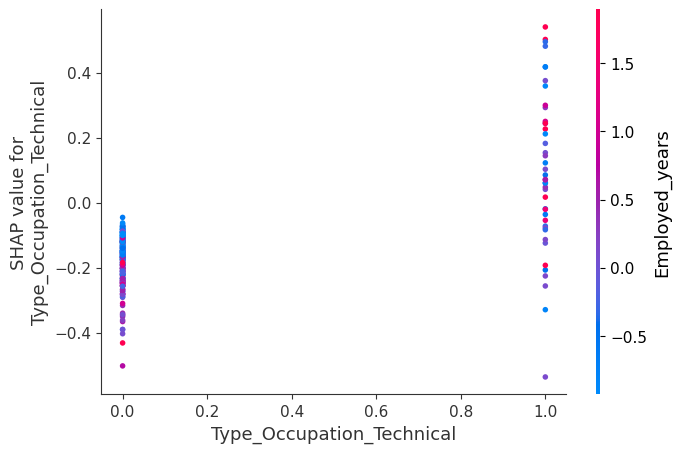

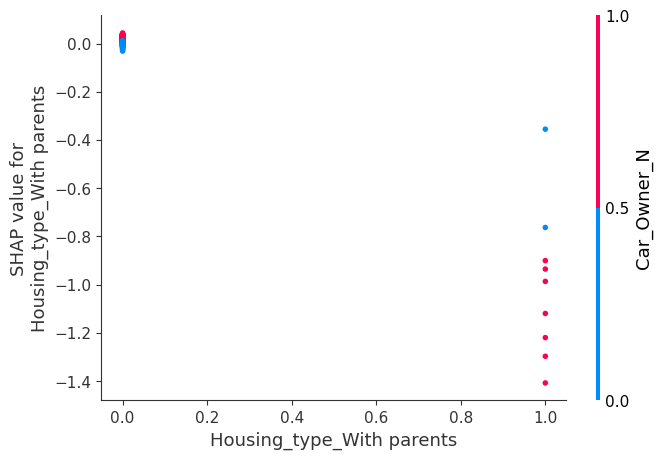

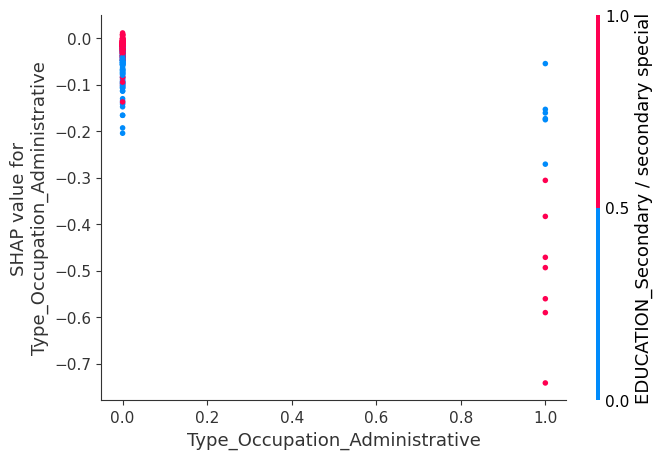

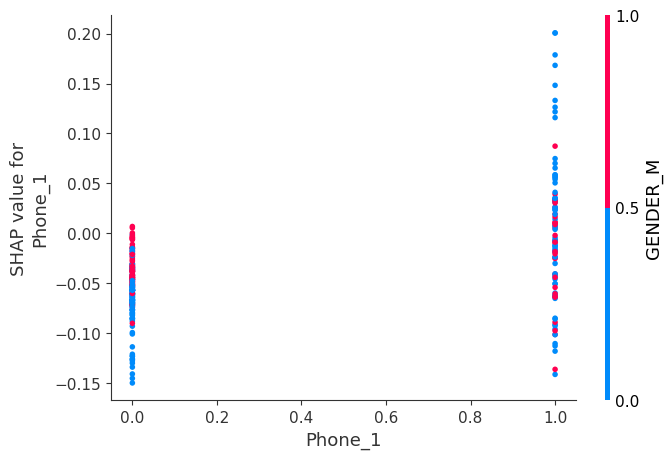

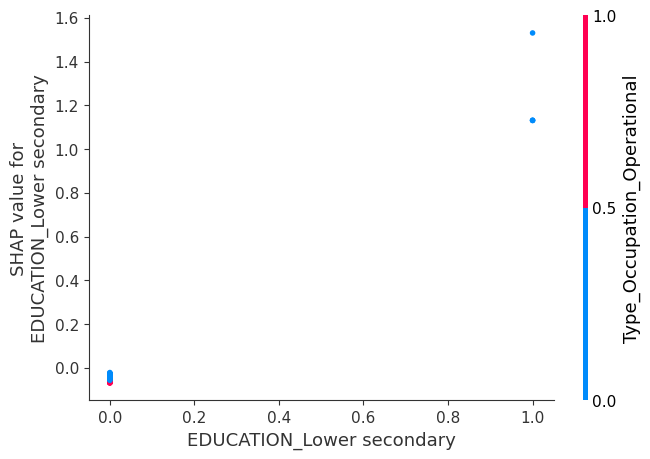

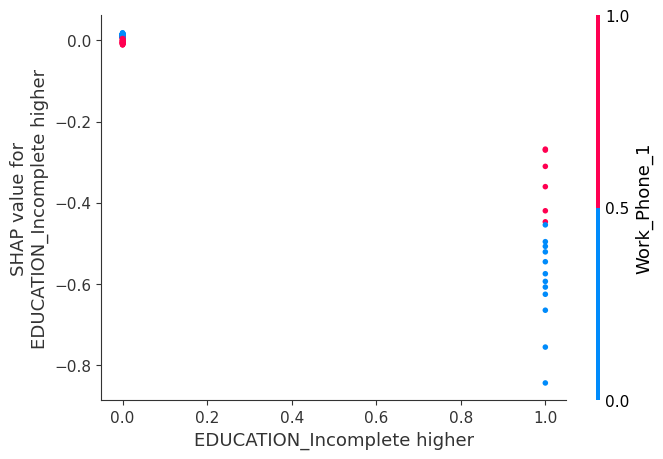

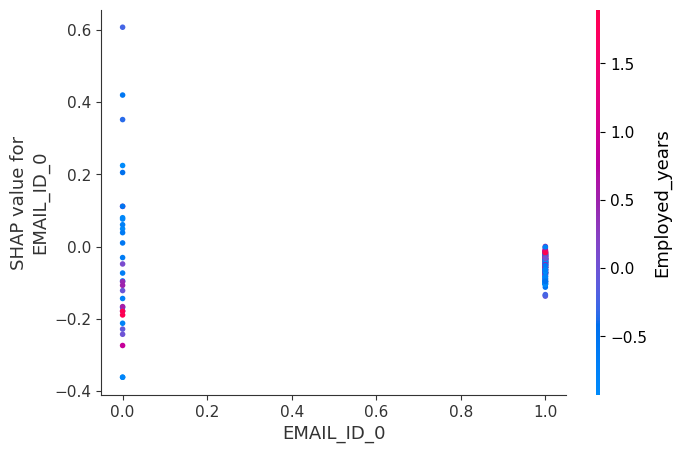

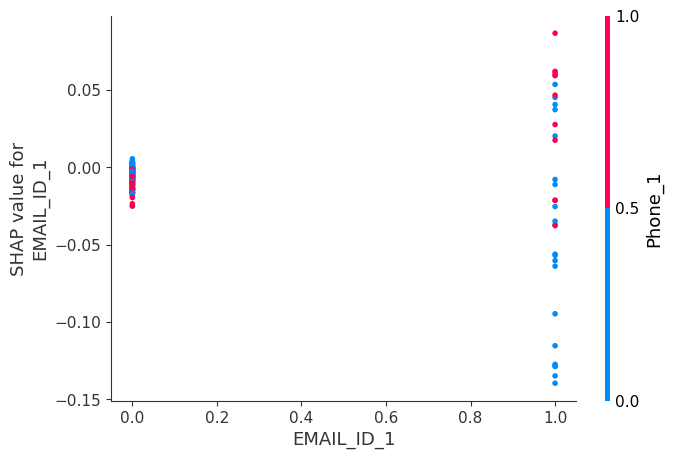

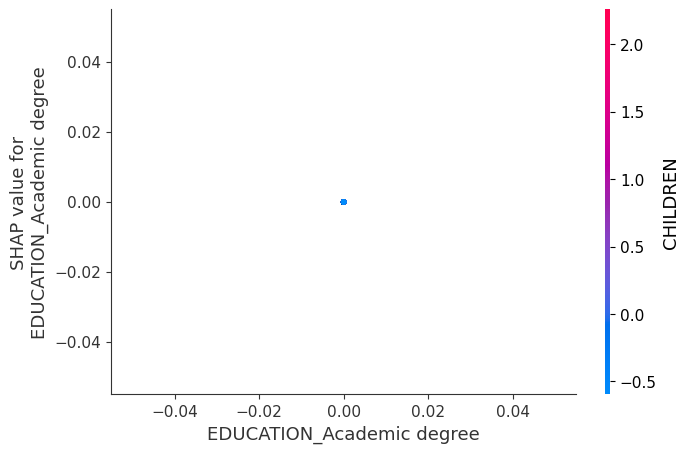

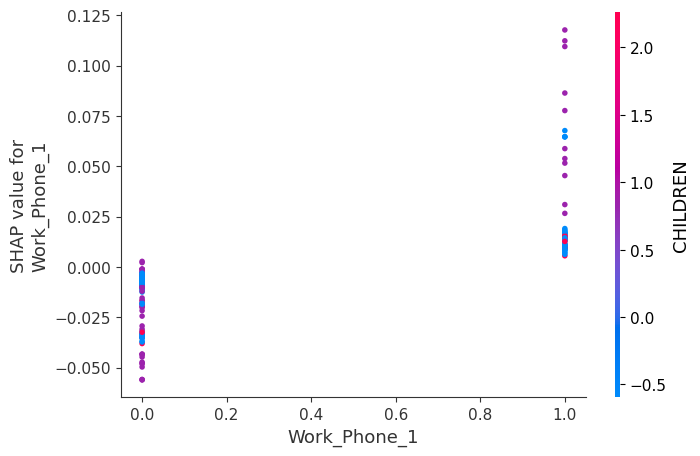

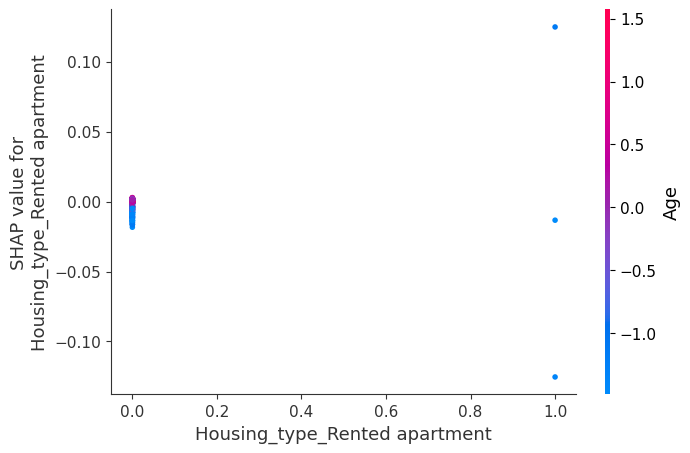

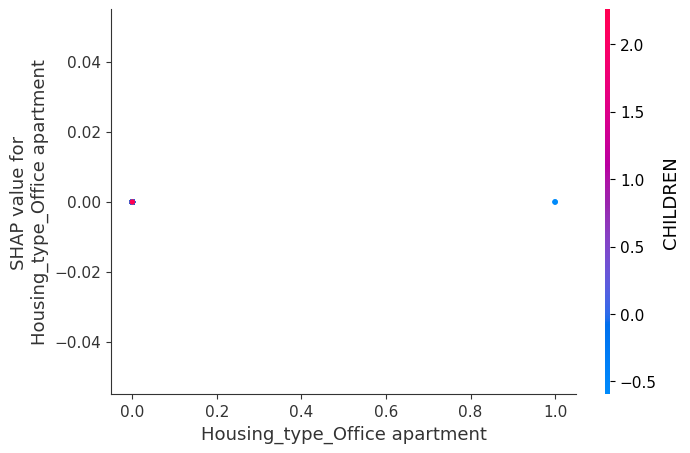

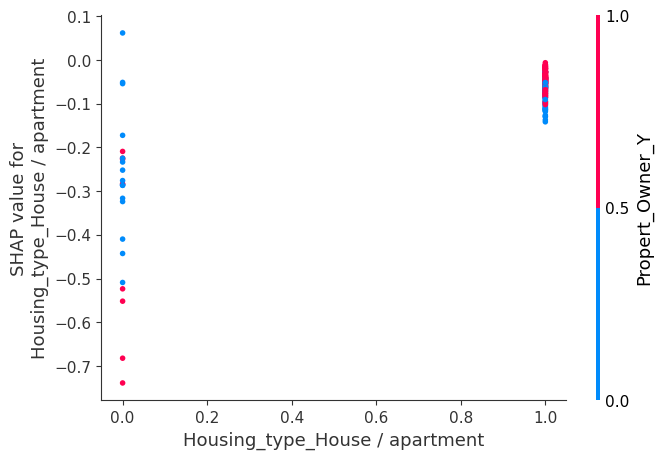

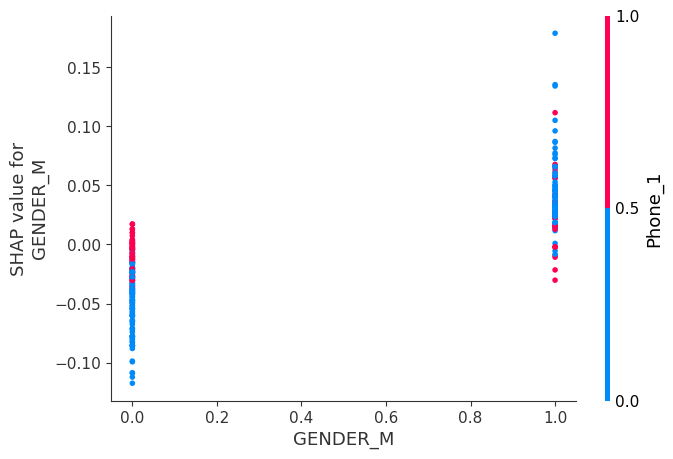

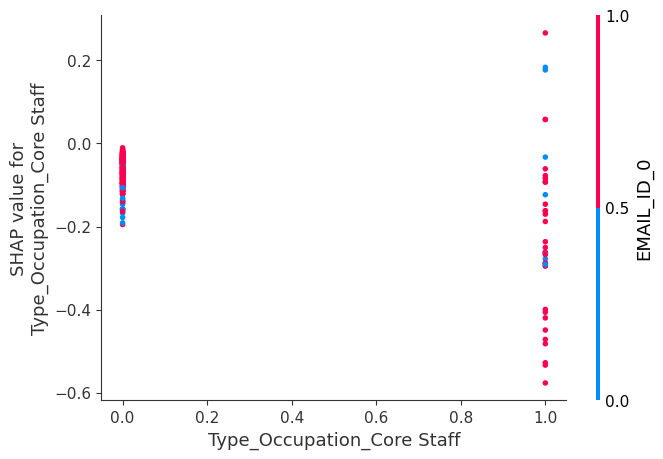

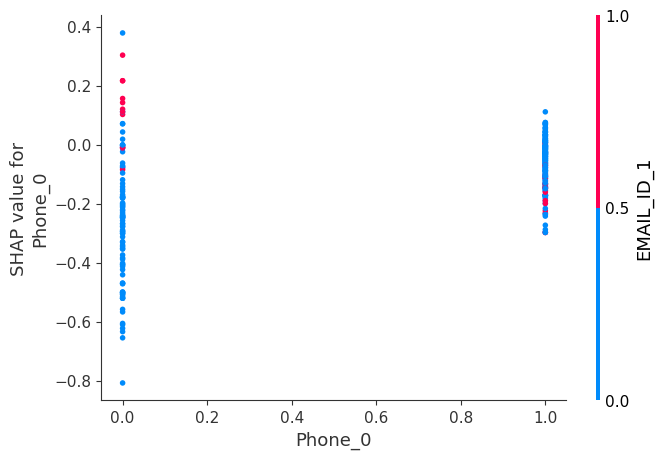

In [131]:
# Focus specifically on the GENDER feature to analyze its impact
for i in feature_importance_df["feature"] :
    shap.dependence_plot(i, shap_values, X_val_final)

In [133]:
# Misalnya untuk observasi pertama
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_val_final.iloc[0,:])

**Interpretasi:**

Untuk memberikan rekomendasi dan tindakan yang tepat bagi individu berisiko gagal bayar, nilai SHAP individu digunakan untuk menilai pengaruh fitur terhadap prediksi model. Sebagai contoh, analisis pada satu sampel menunjukkan nilai log-odds sebesar 1,36 yang dikonversi menjadi probabilitas 0,79, melebihi ambang batas 0,5, sehingga diprediksi akan gagal bayar.

Faktor utama dalam prediksi ini adalah jenis tempat tinggal "rented apartment" dan jumlah anak, yang adalah 1. Faktor lain seperti pekerjaan sebagai "labor," usia sekitar 30 tahun, tidak memiliki telepon kerja, dan pendapatan tahunan sebesar 129.392 meningkatkan risiko gagal bayar. Sebaliknya, status pendidikan "incomplete higher" dan status perkawinan "married" menurunkan risiko gagal bayar.